In [ ]:
from google.colab import files
uploaded = files.upload()   #loading the train dataset

Saving KDDTrain+.txt to KDDTrain+.txt


## Importing the KDDTrain+ and KDDTest+ dataset files in colab

In [ ]:
from google.colab import files
uploaded = files.upload()   #loading the test dataset

Saving KDDTest+.txt to KDDTest+.txt


In [33]:
import pandas as pd  #importing the necessary packages
import warnings
warnings.filterwarnings("ignore")
import shutil
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import f1_score, make_scorer
import itertools
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Loading the data into dataframes

In [3]:
df_train=pd.read_csv("KDDTrain+.txt")
df_test=pd.read_csv("KDDTest+.txt")

In [ ]:
df_train.head() #checking the first 5 rows of the data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
df_train.tail() #checking the last 5 rows of the data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.0,255,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.0,255,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [ ]:
print("Number of data points in train data", df_train.shape)  #checking the shape and the total number of attributes of the data
print('-'*50)
print("The attributes of data :", df_train.columns.values)

Number of data points in train data (125972, 43)
--------------------------------------------------
The attributes of data : ['0' 'tcp' 'ftp_data' 'SF' '491' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7'
 '0.8' '0.9' '0.10' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16' '0.17' '2'
 '2.1' '0.00' '0.00.1' '0.00.2' '0.00.3' '1.00' '0.00.4' '0.00.5' '150'
 '25' '0.17.1' '0.03' '0.17.2' '0.00.6' '0.00.7' '0.00.8' '0.05' '0.00.9'
 'normal' '20']


In [ ]:
print("Number of data points in test data", df_test.shape)
print(df_test.columns.values)
df_test.head(2)

Number of data points in test data (22543, 43)
['0' 'tcp' 'private' 'REJ' '0.1' '0.2' '0.3' '0.4' '0.5' '0.6' '0.7' '0.8'
 '0.9' '0.10' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16' '0.17' '0.18'
 '229' '10' '0.00' '0.00.1' '1.00' '1.00.1' '0.04' '0.06' '0.00.2' '255'
 '10.1' '0.04.1' '0.06.1' '0.00.3' '0.00.4' '0.00.5' '0.00.6' '1.00.2'
 '1.00.3' 'neptune' '21']


,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21


In [ ]:
df_train.dtypes  #checking the datatypes of all the columns

0             int64
tcp          object
ftp_data     object
SF           object
491           int64
0.1           int64
0.2           int64
0.3           int64
0.4           int64
0.5           int64
0.6           int64
0.7           int64
0.8           int64
0.9           int64
0.10          int64
0.11          int64
0.12          int64
0.13          int64
0.14          int64
0.15          int64
0.16          int64
0.17          int64
2             int64
2.1           int64
0.00        float64
0.00.1      float64
0.00.2      float64
0.00.3      float64
1.00        float64
0.00.4      float64
0.00.5      float64
150           int64
25            int64
0.17.1      float64
0.03        float64
0.17.2      float64
0.00.6      float64
0.00.7      float64
0.00.8      float64
0.05        float64
0.00.9      float64
normal       object
20            int64
dtype: object

In [4]:
#renaming the columns

df_train = df_train.rename(columns={"0":"Duration","tcp":"protocol_type","ftp_data":"service","SF":"flag","491":"src_bytes",
                                    "0.1":"dest_bytes","0.2":"Land","0.3":"wrong_fragment","0.4":"Urgent packets","0.5":"hot",
                                    "0.6":"num_failed_logins","0.7":"logged_in","0.8":"num_compromised","0.9":"root_shell",
                                    "0.10":"su_attempted","0.11":"num_root","0.12":"num_file_creations","0.13":"num_shells",
                                    "0.14":"num_access_files","0.15":"num_outbound_cmds","0.16":"is_host_login","0.17":"is_guest_login",
                                    "2":"count","2.1":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","0.00.2":"rerror_rate",
                                    "0.00.3":"srv_rerror_rate","1.00":"same_srv_rate","0.00.4":"diff_srv_rate","0.00.5":"srv_diff_host_rate",
                                    "150":"dst_host_count","25":"dst_host_srv_count","0.17.1":"dst_host_same_srv_rate",
                                    "0.03":"dst_host_diff_srv_rate","0.17.2":"dst_host_same_src_port_rate",
                                    "0.00.6":"dst_host_srv_diff_host_rate","0.00.7":"dst_host_serror_rate",
                                    "0.00.8":"dst_host_srv_serror_rate","0.05":"dst_host_rerror_rate","0.00.9":"dst_host_srv_rerror_rate",
                                    "normal":"attack_type","20":"Score"})

In [ ]:
df_train.head()  #checking the dataframe after renaming

,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
#renaming the columns of test data

df_test = df_test.rename(columns={"0":"Duration","tcp":"protocol_type","private":"service","REJ":"flag","0.1":"src_bytes",
                                    "0.2":"dest_bytes","0.3":"Land","0.4":"wrong_fragment","0.5":"Urgent packets","0.6":"hot",
                                    "0.7":"num_failed_logins","0.8":"logged_in","0.9":"num_compromised","0.10":"root_shell",
                                    "0.11":"su_attempted","0.12":"num_root","0.13":"num_file_creations","0.14":"num_shells",
                                    "0.15":"num_access_files","0.16":"num_outbound_cmds","0.17":"is_host_login","0.18":"is_guest_login",
                                    "229":"count","10":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","1.00":"rerror_rate",
                                    "1.00.1":"srv_rerror_rate","0.04":"same_srv_rate","0.06":"diff_srv_rate","0.00.2":"srv_diff_host_rate",
                                    "255":"dst_host_count","10.1":"dst_host_srv_count","0.04.1":"dst_host_same_srv_rate",
                                    "0.06.1":"dst_host_diff_srv_rate","0.00.3":"dst_host_same_src_port_rate",
                                    "0.00.4":"dst_host_srv_diff_host_rate","0.00.5":"dst_host_serror_rate",
                                    "0.00.6":"dst_host_srv_serror_rate","1.00.2":"dst_host_rerror_rate","1.00.3":"dst_host_srv_rerror_rate",
                                    "neptune":"attack_type","21":"Score"})


In [ ]:
df_train.head()

,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
df_test.head()

,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 43)


In [ ]:
# Finding the null values.
print(df_train.isnull().sum())

Duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dest_bytes                     0
Land                           0
wrong_fragment                 0
Urgent packets                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Exploratory Data Analysis

In [ ]:
y_value_counts = df_train['attack_type'].value_counts()  #checking the distribution of different class of the class label


Ploting the bar plot of attack type variable to check the distribution of different class in the dataset-Train

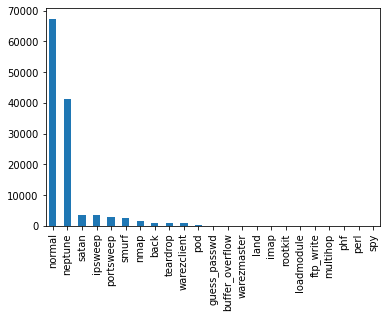

In [ ]:
 %matplotlib inline
 y_value_counts.plot(kind="bar", fontsize=10)

Ploting the bar plot of attack type variable to check the distribution of different class in the dataset-Test

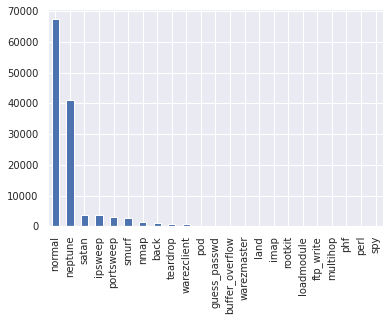

In [ ]:
y_test_value_counts = df_train['attack_type'].value_counts()  
%matplotlib inline
y_test_value_counts.plot(kind="bar", fontsize=10)

Observation: The above plot clearly shows that the attack type "normal" has the highest distribution in the data followed by "neptune" and then the other classes whose value count is very less compared to these two classes. The distribution is almost same for both test dataset and train dataset.

In [ ]:
counter = Counter(df_train['attack_type'])
a=dict(counter)
per=[]
for k,v in counter.items():
	per.append(v / len(df_train['attack_type']) * 100) #calculating the percentage distribution of my class label

## Plotting the pie chart of attack type with the percentage distribution of each attack type 

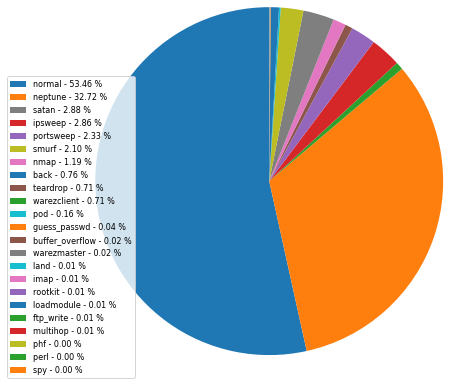

In [ ]:
patches, texts = plt.pie(per, startangle=90, radius=2)  #https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(a.keys(), per)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, per),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches,labels , loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

The above plot gives an idea of the percentage value of each class. The normal class covers almost 53% of the data followed by neptune class which covers 32% and then the rest of the classes each covering less than 3% of the entire dataset. From the above plot we can conclude that our dataset is an imbalanced dataset with huge difference in the distribution of different class labels

Lets have a look at the distribution of each feature of the dataframe.

---

---





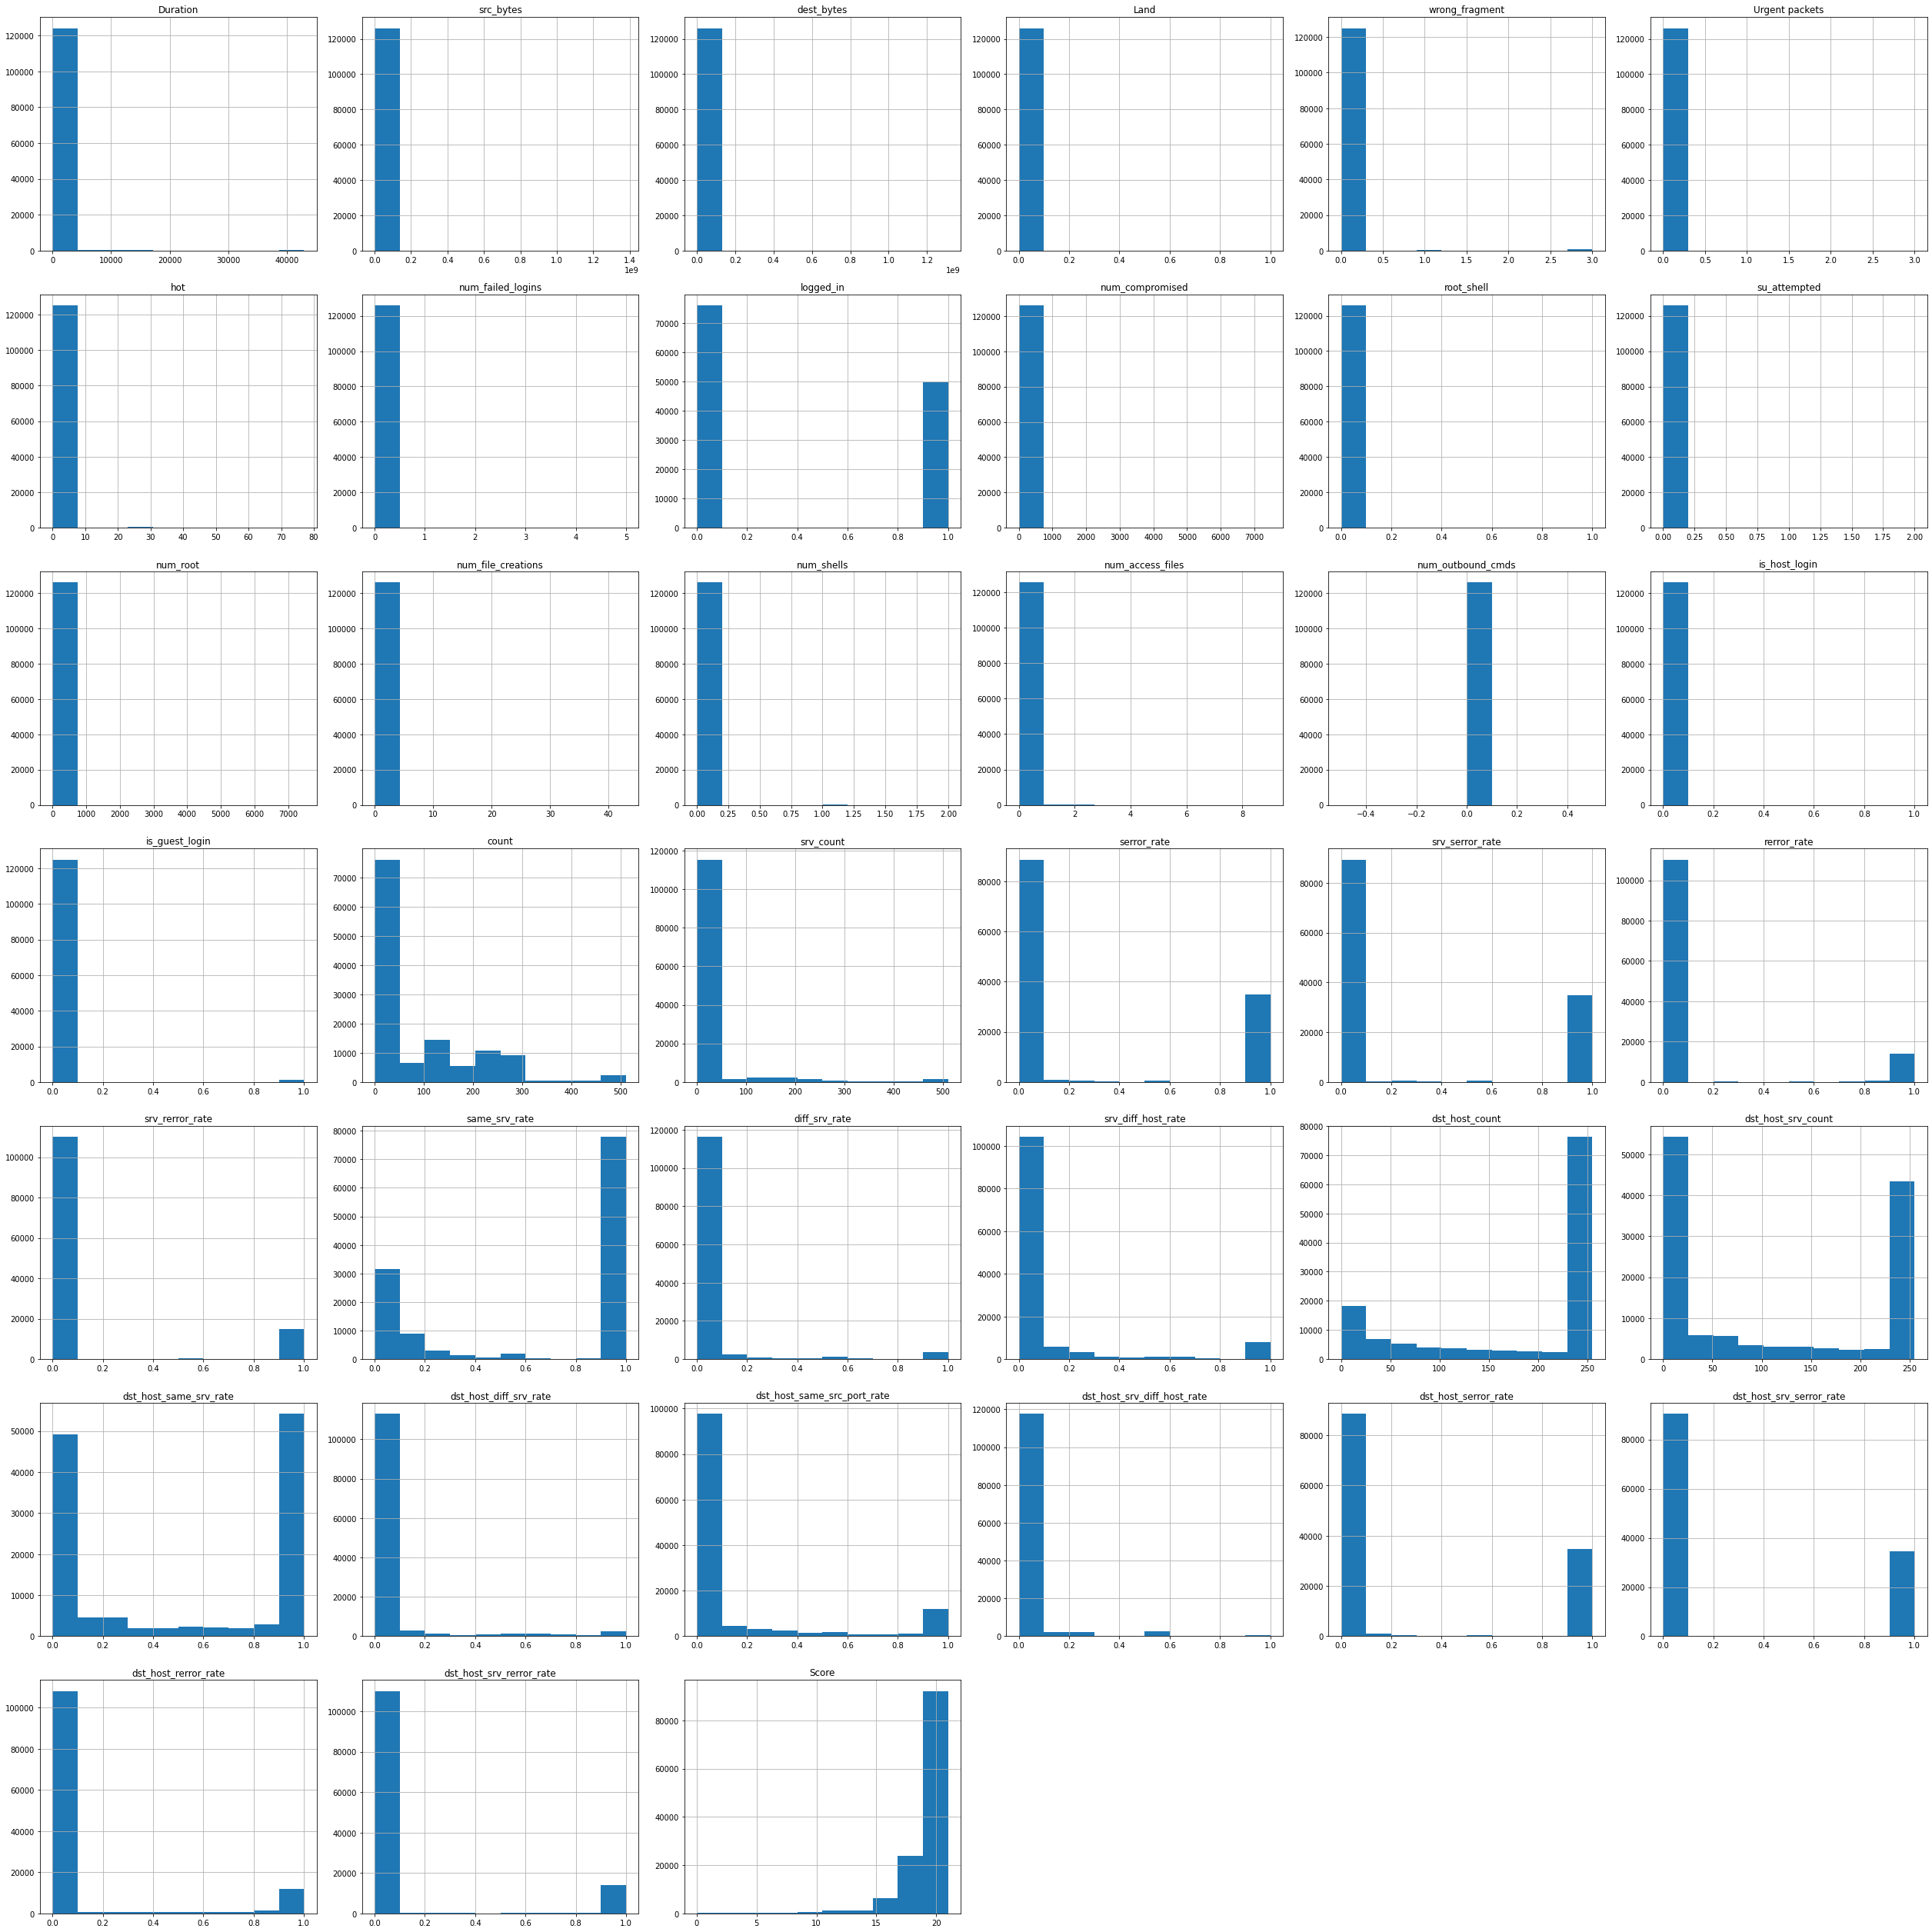

In [ ]:
df_train.hist(figsize=(35,35)) 
plt.tight_layout()
plt.show()

## Now lets view the correlation between features and target variable.

In [ ]:
pip install phik

     |████████████████████████████████| 604kB 7.8MB/s 
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=158d2c2395a78002cbda92ca3016f0046294ad537ae275ca13254cc23cd3a7bd
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
Successfully built phik


In [ ]:
import phik
from phik import resources, report
corr_matrix=df_train.phik_matrix()
corr_matrix

interval columns not set, guessing: ['Duration', 'src_bytes', 'dest_bytes', 'Land', 'wrong_fragment', 'Urgent packets', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Score']


,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
Duration,1.000000,0.137743,0.450609,0.405342,0.164407,0.135033,0.000000,0.000000,0.015780,0.104382,0.043021,0.084503,0.165008,0.212123,0.290983,0.188257,0.304300,0.000000,0.284227,0.000000,0.024327,0.106246,0.031221,0.083085,0.082280,0.224681,0.218448,0.107083,0.108280,0.053988,0.065191,0.138973,0.137206,0.592465,0.298200,0.033399,0.110079,0.140700,0.233072,0.240959,0.410612,0.328373
protocol_type,0.137743,1.000000,0.986618,0.427788,0.000000,0.000000,0.003250,0.481678,0.000000,0.039577,0.020423,0.236025,0.000000,0.010232,0.025566,0.000000,0.000000,0.017550,0.027519,0.000000,0.027867,0.422960,0.692071,0.338454,0.338120,0.208654,0.210023,0.335598,0.201162,0.419980,0.356162,0.388230,0.333489,0.276879,0.589328,0.590744,0.334486,0.332243,0.203144,0.210402,0.839022,0.493724
service,0.450609,0.986618,1.000000,0.692821,0.017733,0.000000,0.139223,0.406253,0.050499,0.603425,0.185501,0.963961,0.063172,0.202190,0.253721,0.079027,0.167302,0.100486,0.122840,0.000000,0.933769,0.787417,0.766035,0.622845,0.603689,0.413232,0.332799,0.723524,0.458282,0.641781,0.613573,0.807590,0.815051,0.560429,0.682359,0.687488,0.626868,0.633223,0.415572,0.428705,0.857744,0.610648
flag,0.405342,0.427788,0.692821,1.000000,0.181184,0.040010,0.021895,0.093140,0.000000,0.053099,0.101978,0.671195,0.048238,0.055084,0.087764,0.048442,0.077490,0.012033,0.034412,0.000000,0.082396,0.523586,0.193628,0.704517,0.684526,0.675034,0.669159,0.587754,0.346256,0.255222,0.357977,0.521510,0.542758,0.466461,0.339359,0.208443,0.648644,0.682778,0.627790,0.654591,0.802958,0.337941
src_bytes,0.164407,0.000000,0.017733,0.181184,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087839,0.101348,0.056924,0.062774,0.000000,0.032291,0.000000,0.021536,0.000000,0.007222,0.024774,0.008196,0.000000,0.018050,0.068280,0.022896,0.072944,0.029345,0.084673
dest_bytes,0.135033,0.000000,0.000000,0.040010,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008062,0.007152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053766,0.011117,0.000000,0.000000,0.000000,0.011239,0.008128,0.035515,0.096407
Land,0.000000,0.003250,0.139223,0.021895,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.016418,0.000000,0.010377,0.000000,0.000000,0.000000,0.000000,0.000000,0.156329,0.000000,0.008160,0.000000,0.029518,0.027521,0.030723,0.000000,0.007351,0.000000,0.053866,0.043253,0.018012,0.013003,0.000000,0.048302,0.135280,0.028235,0.129478,0.000000,0.000000,0.904487,0.101963
wrong_fragment,0.000000,0.481678,0.406253,0.093140,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.045489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004933,0.182183,0.406767,0.152161,0.070087,0.039865,0.040060,0.087847,0.028463,0.177336,0.087923,0.198119,0.223740,0.123192,0.236966,0.093763,0.130825,0.068645,0.240024,0.040146,0.991632,0.310151
Urgent packets,0.015780,0.000000,0.050499,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.319470,0.011331,0.214683,0.168979,0.103699,0.178913,0.142506,0.000000,0.027927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
print(corr_matrix["attack_type"].sort_values(ascending=False)[1:])

wrong_fragment                 0.991632
Land                           0.904487
service                        0.857744
protocol_type                  0.839022
logged_in                      0.808240
flag                           0.802958
Score                          0.734857
count                          0.716956
dst_host_srv_diff_host_rate    0.711383
same_srv_rate                  0.672181
dst_host_serror_rate           0.670254
serror_rate                    0.659562
srv_count                      0.645647
srv_serror_rate                0.644567
dst_host_srv_serror_rate       0.643025
dst_host_same_srv_rate         0.641616
dst_host_srv_count             0.638541
dst_host_diff_srv_rate         0.612409
dst_host_same_src_port_rate    0.600643
num_failed_logins              0.588751
rerror_rate                    0.546387
dst_host_rerror_rate           0.543289
dst_host_count                 0.540562
diff_srv_rate                  0.527185
num_shells                     0.522351


In [ ]:
corr = corr_matrix["attack_type"].sort_values(ascending=False)

Hence we can conclude that the features which has strong correlation with the target variables are 

1.  wrong_fragment
2.  Land
3.  service
4.  protocol_type
5.  logged_in
6.  flag
7.  Score
8.  count
9.  dst_host_srv_diff_host_rate
10. same_srv_rate
11. dst_host_serror_rate
12. serror_rate
13. dst_host_srv_serror_rate
14. serror_rate




The above figure covers the rest all continous variables of our dataset and their individual distribution. The histograms shows for most of the features the data is unevenly distributed and one value dominates in all of them. Also we donot see any concrete observation from the distributions like whether the features are gaussian distributed or not. Hence no effective analysis can be made from the univariate analysis except the fact that the data's are unevenly distributed. Lets move to the Bivariate analysis and check relationship between features

# **Univariate analysis**

Here we will check the distribution of features which has strong correlation with target variable along with the class label.

## 1.Plot between wrong fragment and attack types

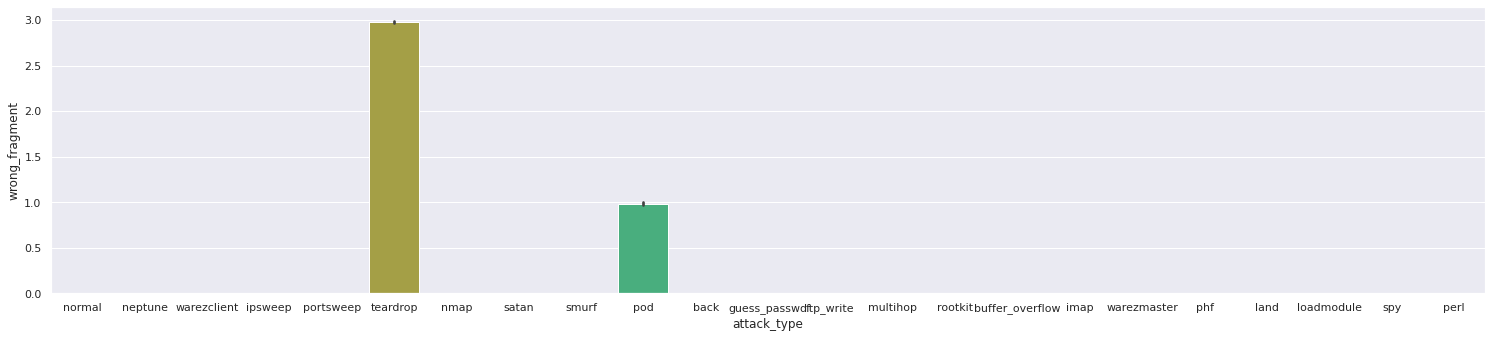

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='wrong_fragment',data=df_train)

In [ ]:
df_train['wrong_fragment'].value_counts()

0    124882
3       884
1       206
Name: wrong_fragment, dtype: int64

Observation: Most of the records with wrong_fragment value "3" and "1" belongs to attack type "teardrop" and "pod". Now lets remove these types from the target class and visualize the distribution again

In [ ]:
df_dash= df_train[(df_train['attack_type'] != 'teardrop') & (df_train['attack_type'] != 'pod')]

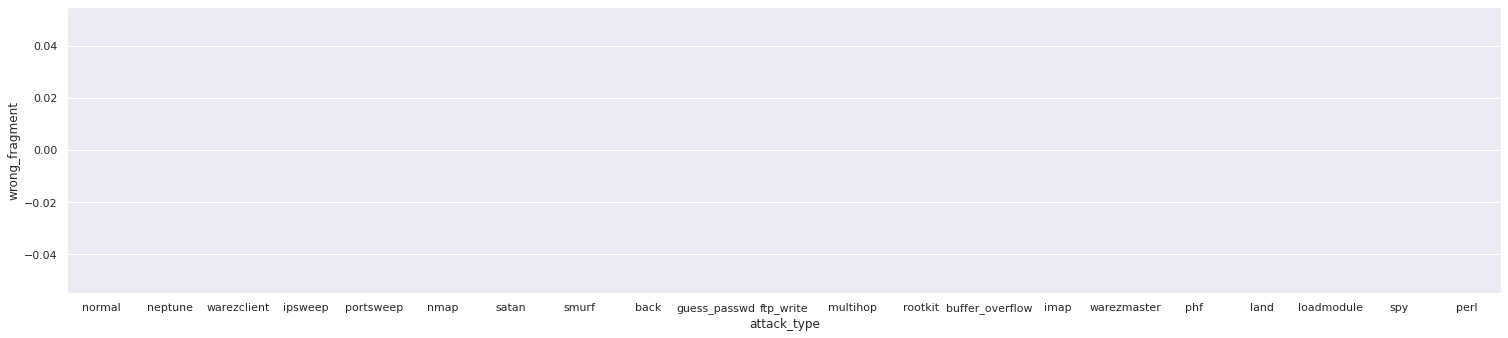

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='wrong_fragment',data=df_dash)

Observation: We can say that rest all the datapoints belongs to wrong_fragment "0" and belongs to rest of the attack types.

Now lets visualize the same for test dataset.

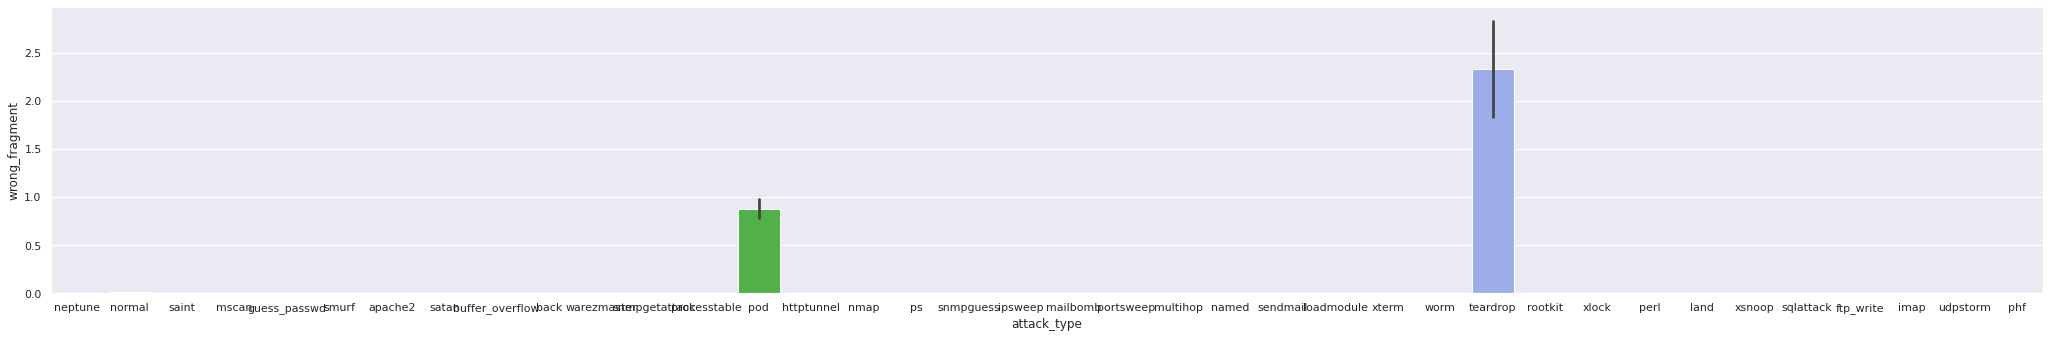

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='wrong_fragment',data=df_test)

Here also we can observe the same distribution. Most datpoints with wrong fragment not equal to 0 belongs to attack type "teardrop" and "pod".

## 2. Plot between land and attack type

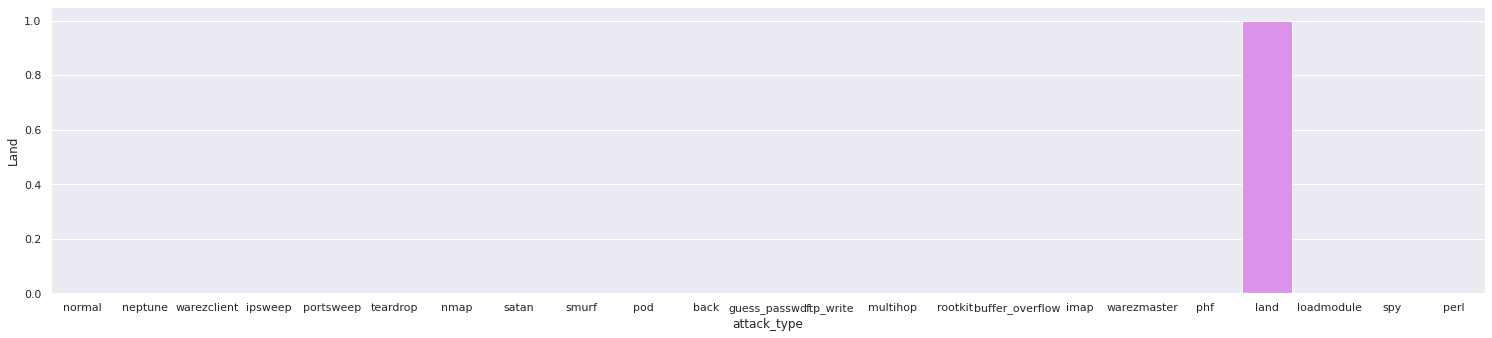

In [ ]:
 %matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='Land',data=df_train)

In [ ]:
df_train['Land'].value_counts()

0    125947
1        25
Name: Land, dtype: int64

Observation: As our feature is binary we can say that the datapoints with Land value 1 belongs to only attack type "land". We will visualize the distribution again after removing the "land" type from class label.

In [ ]:
df_dash= df_train[df_train['attack_type'] != 'land']

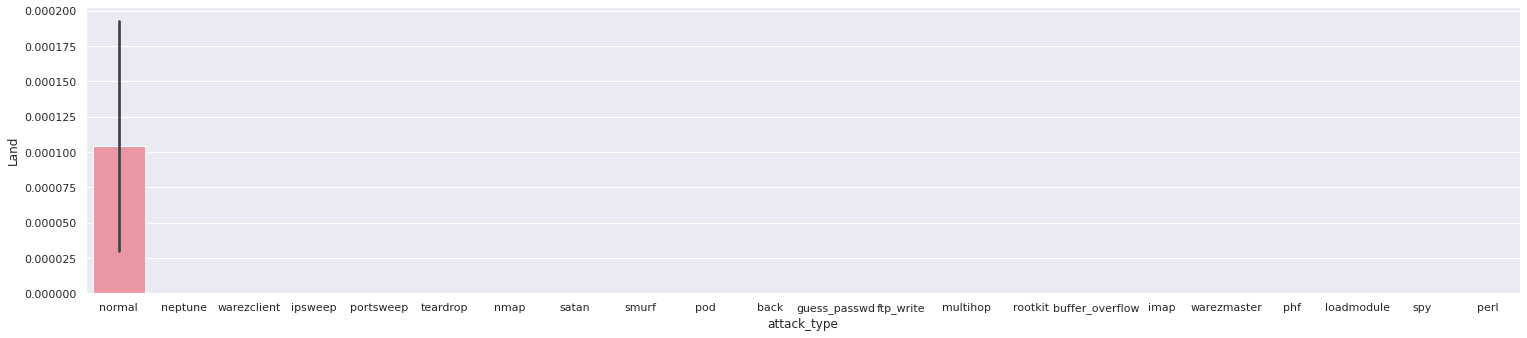

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='Land',data=df_dash)

Observation: Attack type "normal" covers majority of the datapoints with Land value "0". Lets check the same for test dataset.

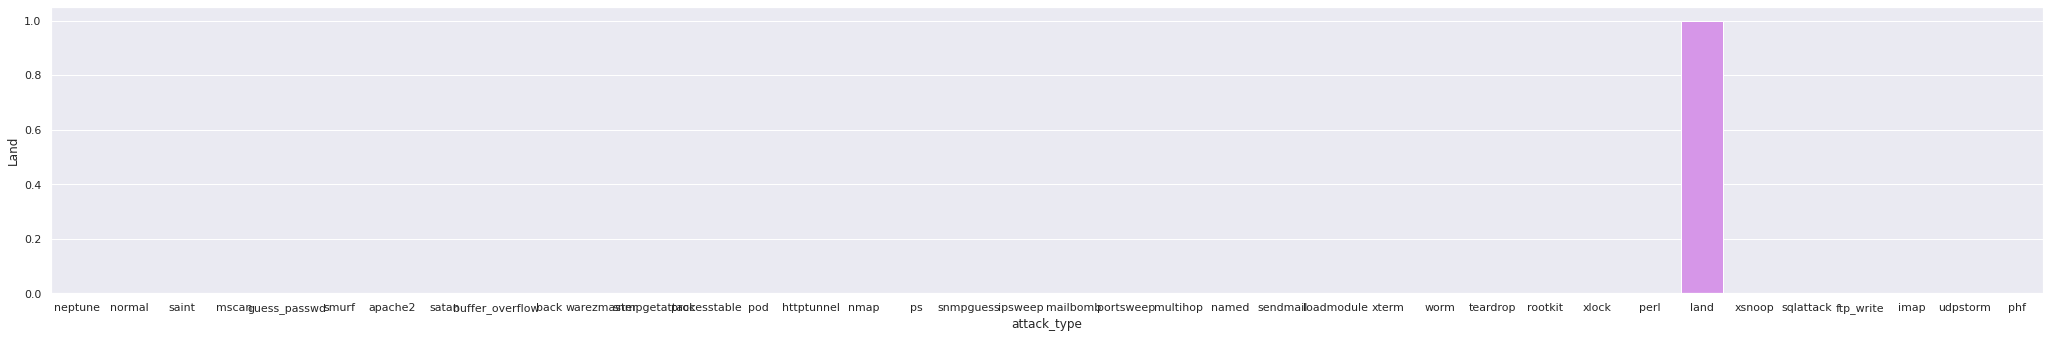

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='Land',data=df_test)

Observation: We can witness the same distribution of Land feature with attack type "land" in the test dataset as well.

## 3. Plot between Service and attack type

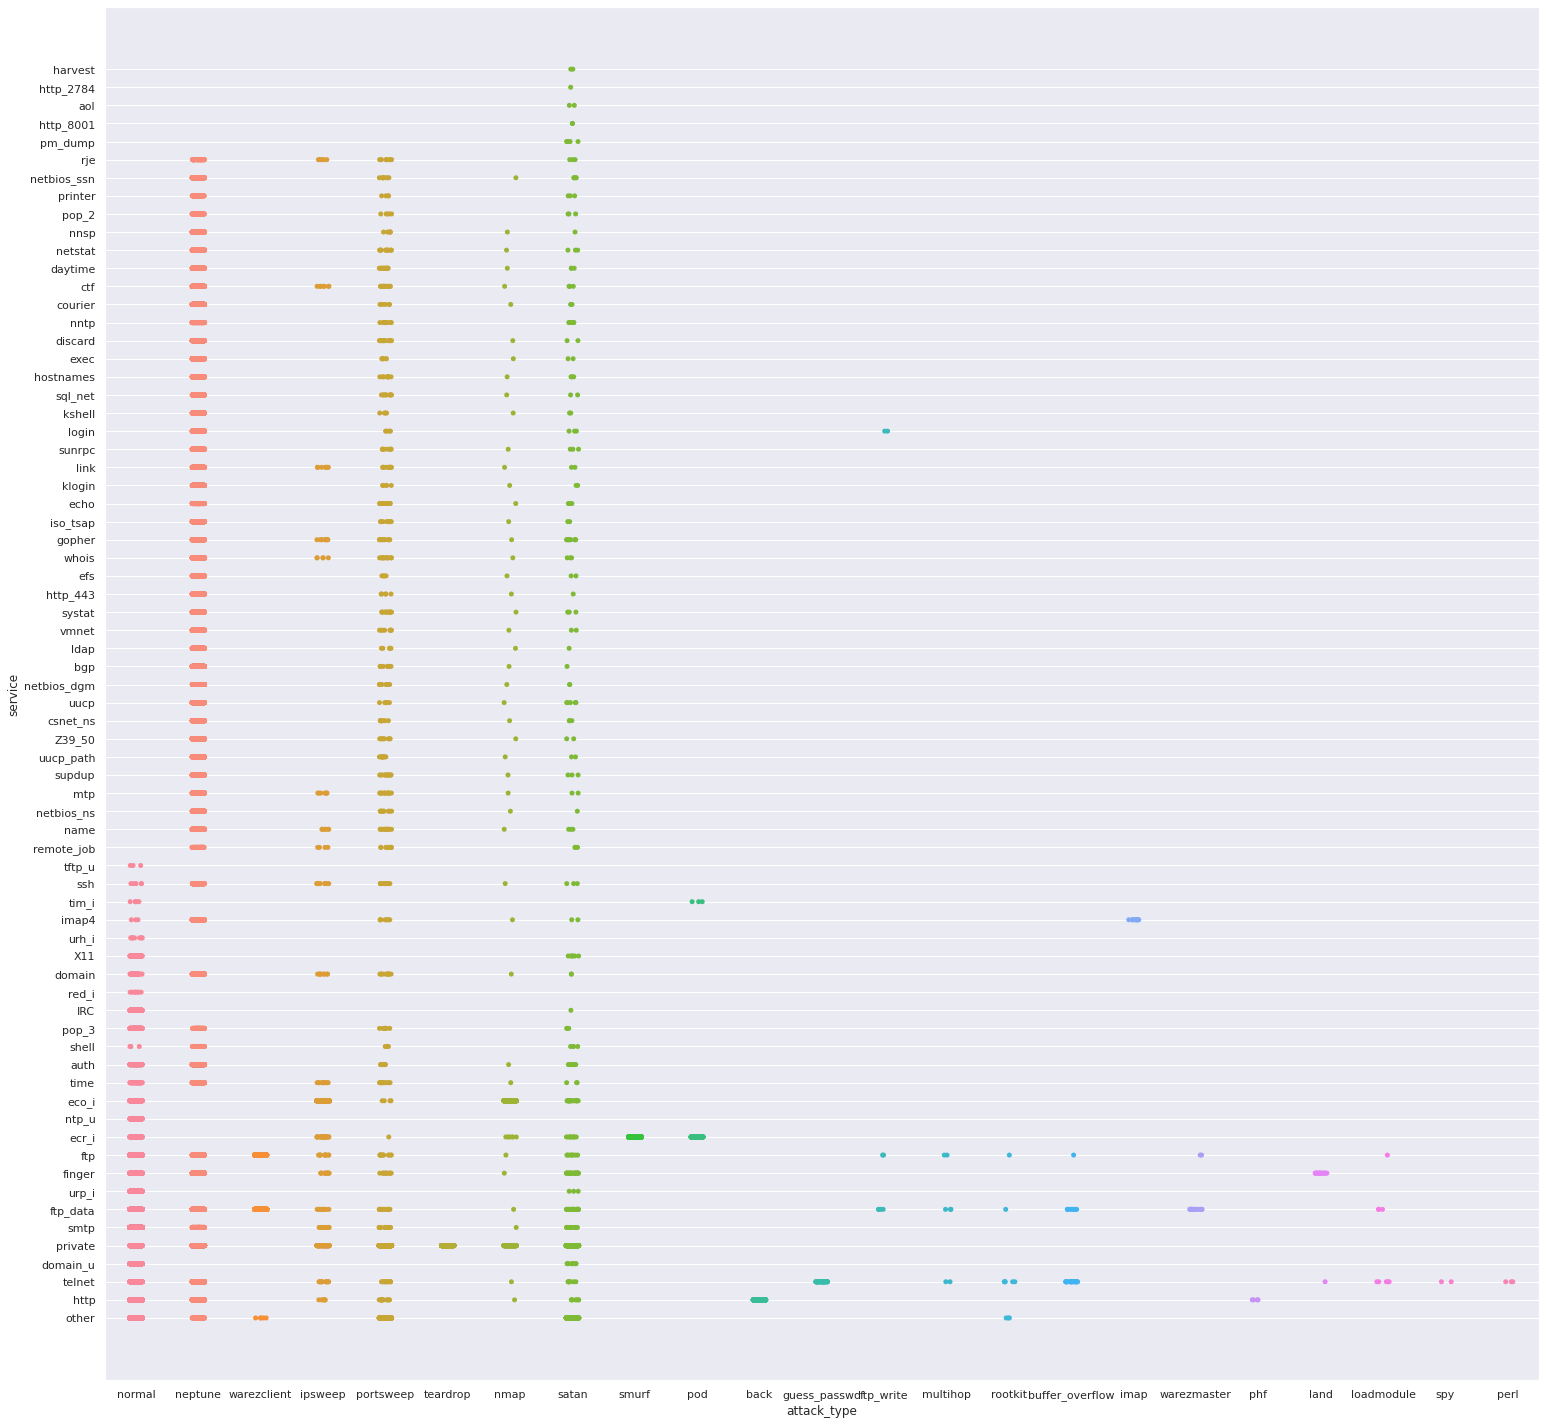

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,25.27)})
sns.stripplot(x=df_train['attack_type'],y=df_train['service'])

Observation : From the above plot we can say the different service types are distributed among all the attack types where "normal","neptune" and "portsweep" covers majority of the service types.

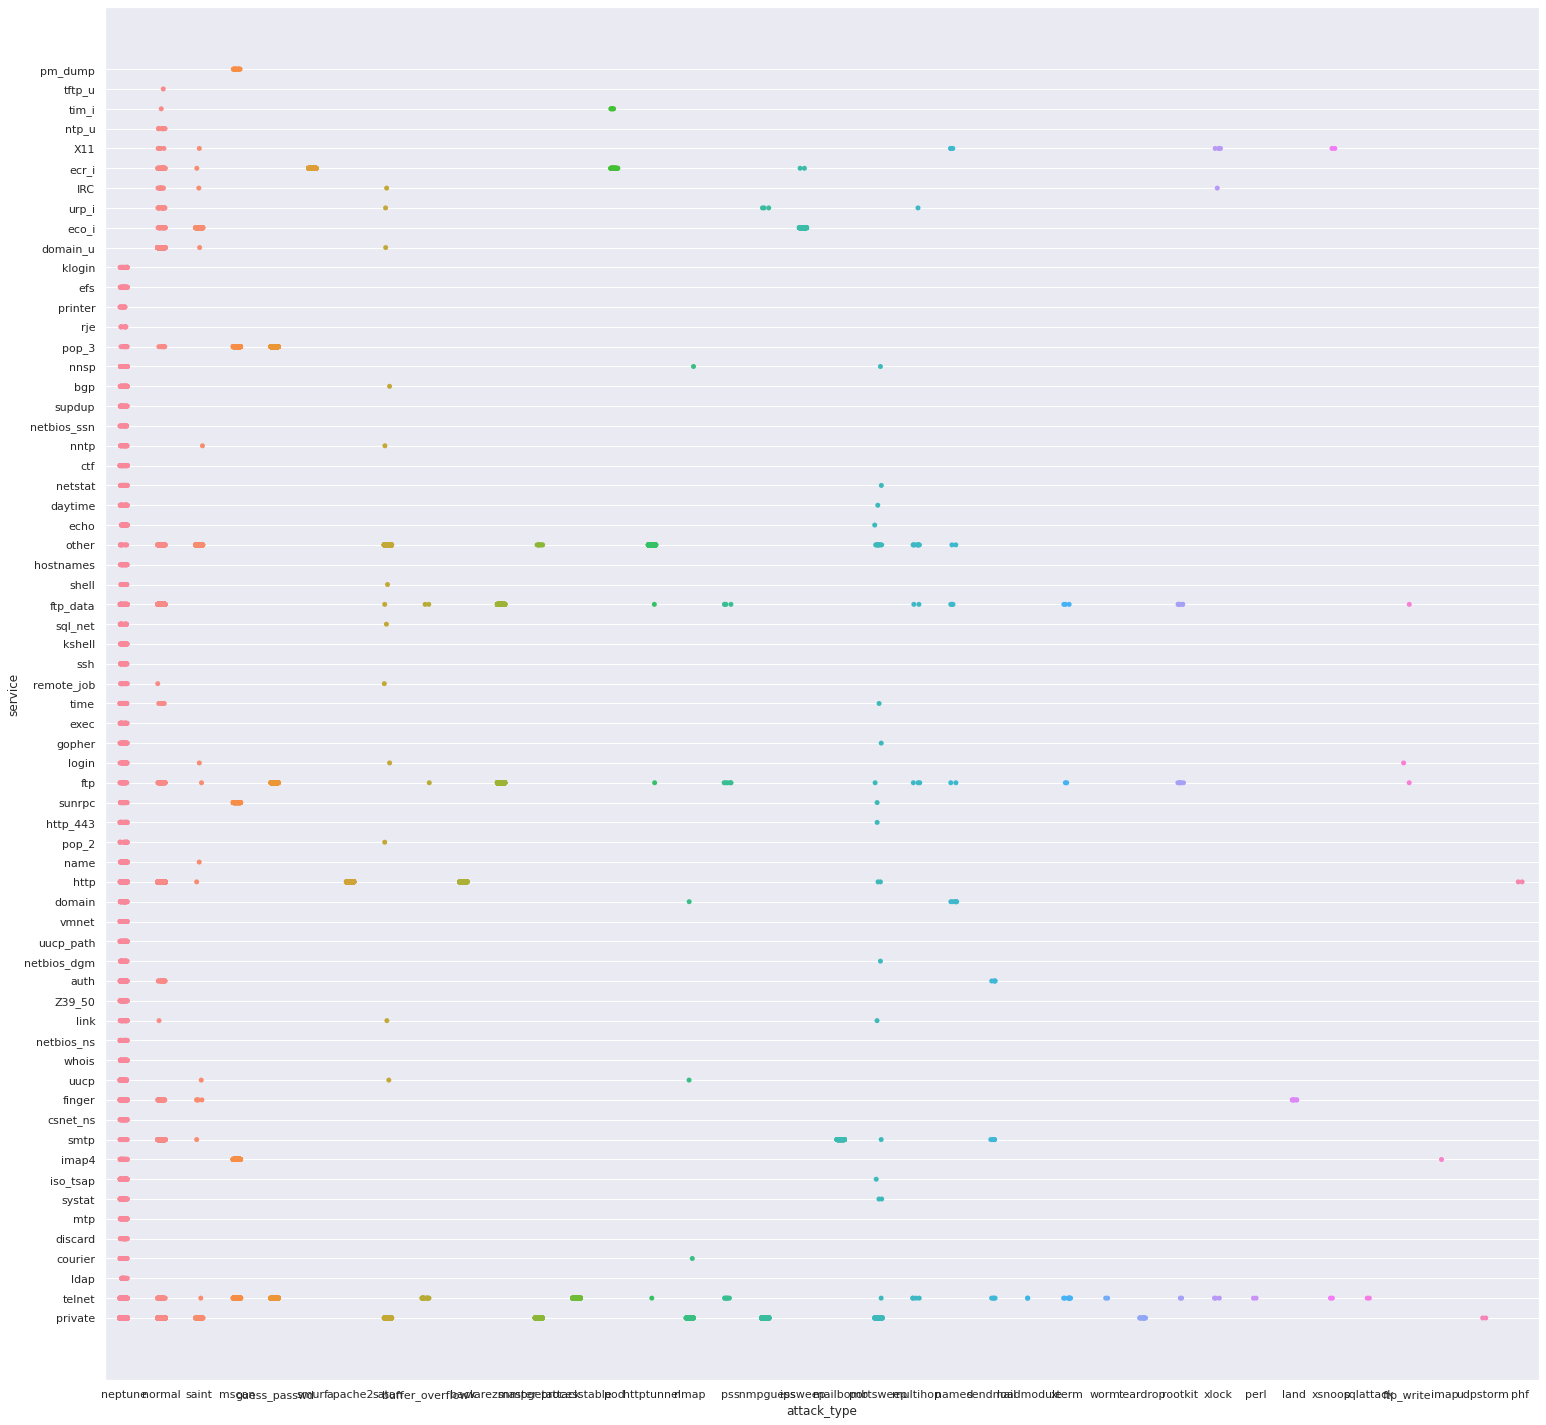

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,25.27)})
sns.stripplot(x=df_test['attack_type'],y=df_test['service'])

Observation: The same can be seen for test dataset as well however we can conclude that attack type "normal" covers all the service types.

## 4. Plot between protocol_type and attack type

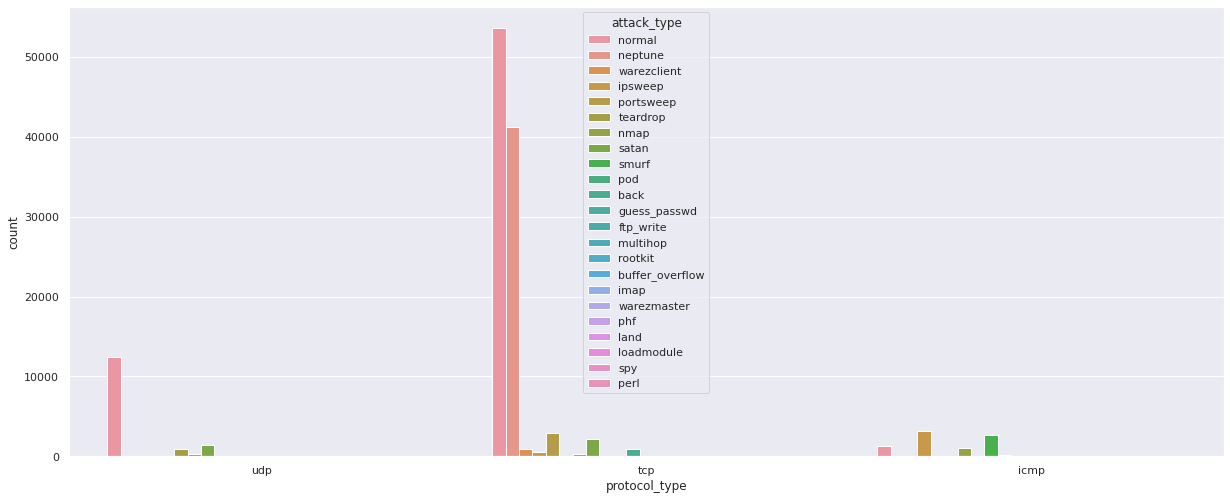

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.countplot(x='protocol_type',hue="attack_type",data=df_train)

Observation: From the above plot we can observe that the protocol type "tcp" covers majority of the datapoints and is distributed between attack type "normal" and "neptune". We will visualize the same for test dataset.

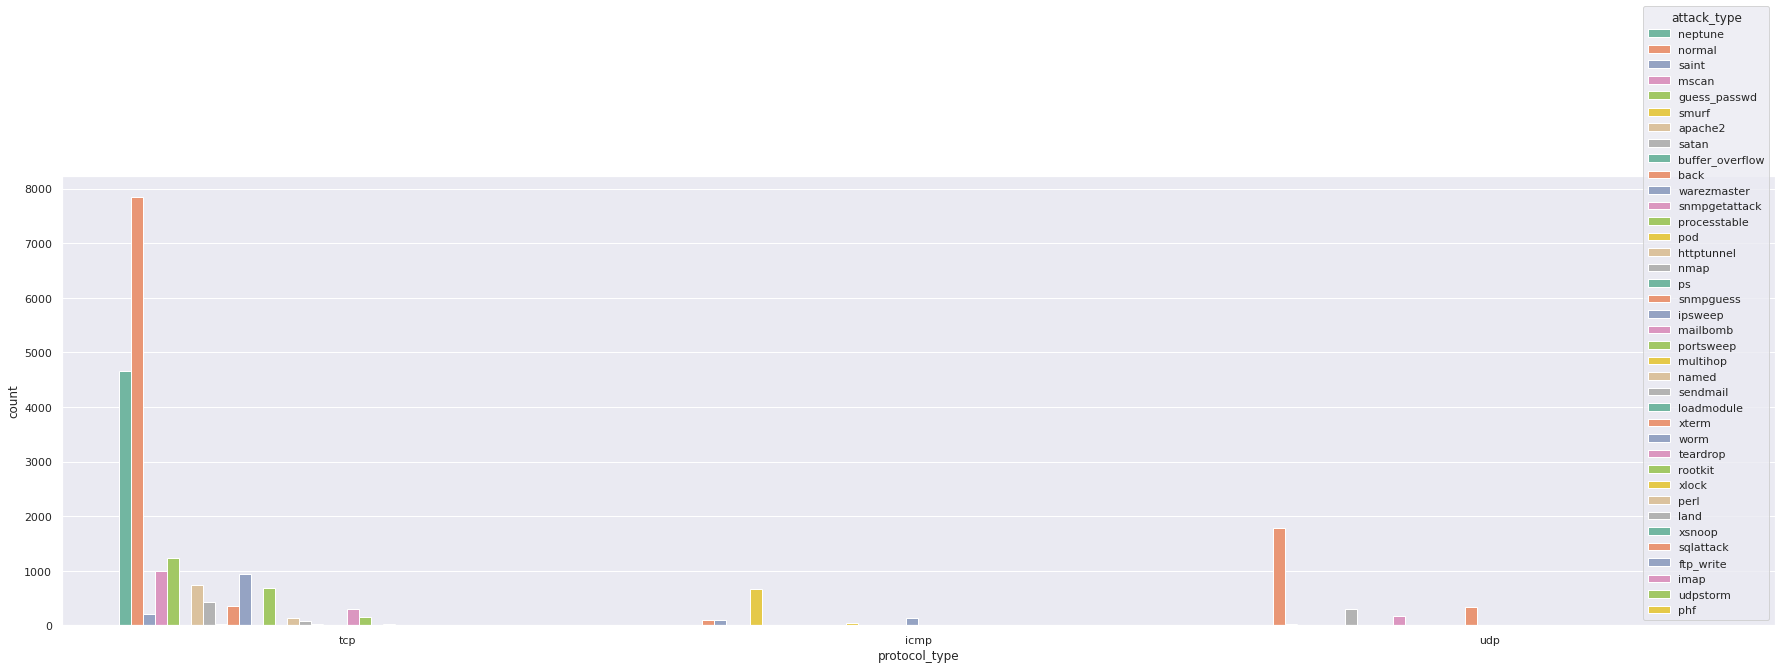

In [ ]:

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,8.27)})
sns.countplot(x='protocol_type',hue="attack_type",data=df_test,palette = "Set2")

Observation: In the test dataset we can observe the same distribution. The protocol type "tcp" covers majority of the dataset with maximum distribution of attack type "normal" followed by "neptune". 

## 5. Plot between logged_in and attack type

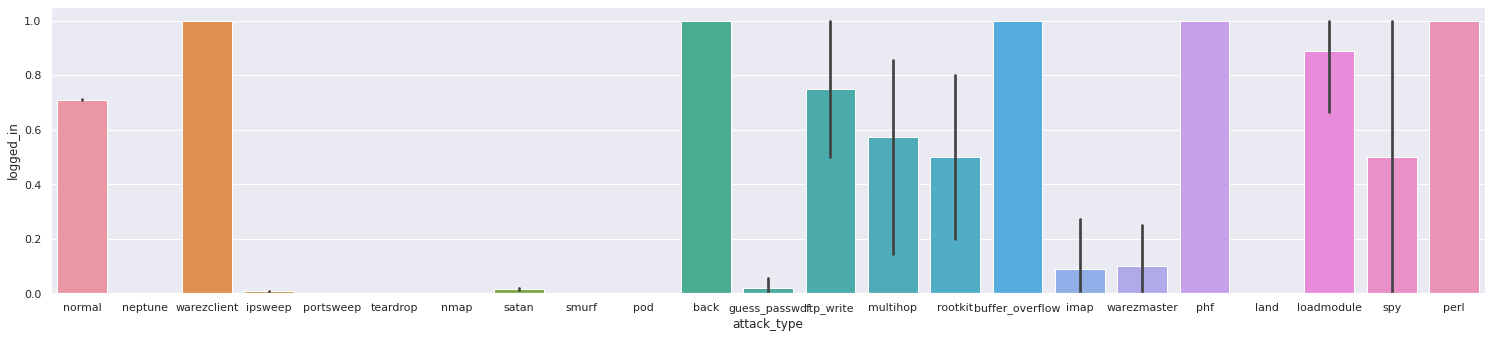

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(25.7,5.27)})
sns.barplot(x='attack_type',y='logged_in',data=df_train)

Observation: From the above plot we can see that the logged in feature is distributed among multiple attack types. Our feature is binarry where both the classes are almost equally distributed, we can see that attack type "warezclient","back","overflow" and "phf" are all covering the logged in value 1. We will visualize the same for test dataset.

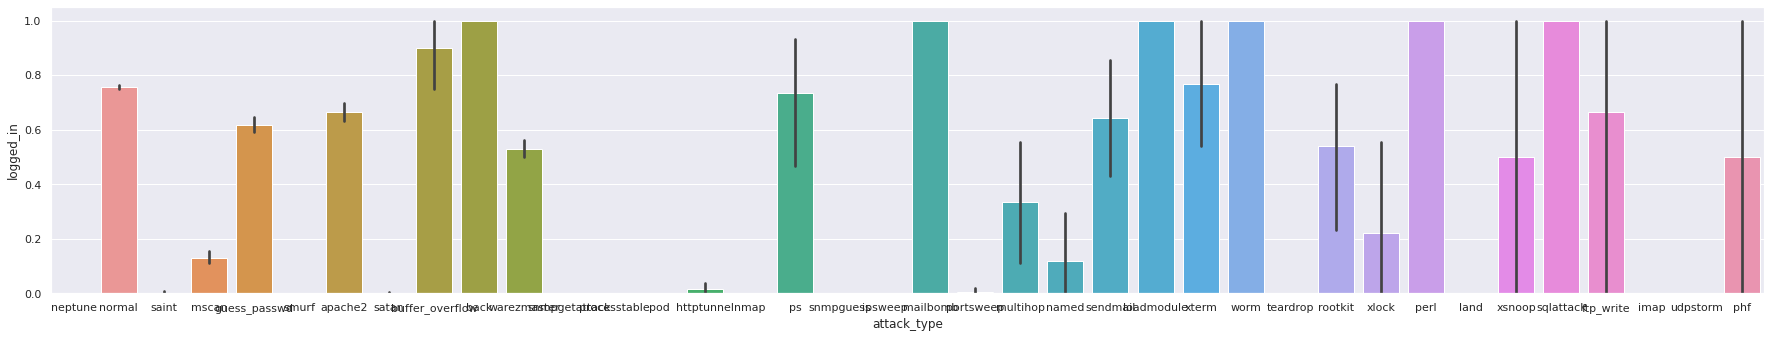

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,5.27)})
sns.barplot(x='attack_type',y='logged_in',data=df_test)

Observation: The same distribution of attack types can be observed from the test dataset as well.

## 6. Plot between flag and attack type

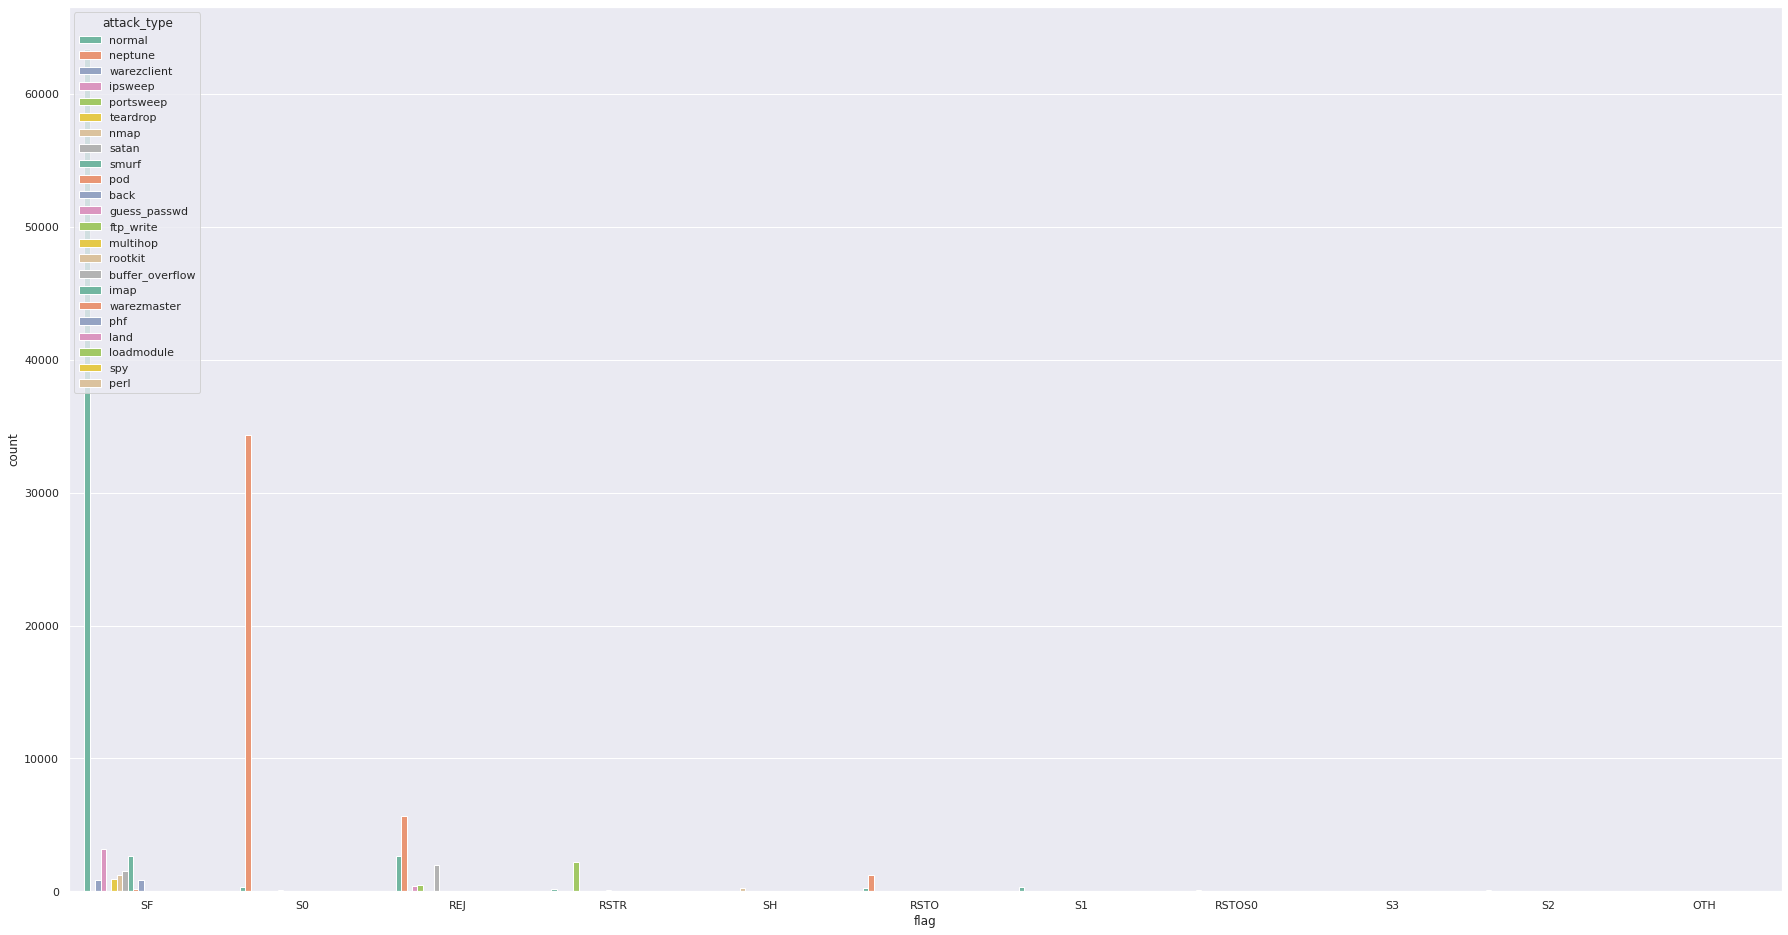

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,16.27)})
sns.countplot(x='flag',hue="attack_type",data=df_train,palette = "Set2")

Observation: From the above plot we can say that the flag type "SF" covers the majority of the distribution followed by "SO" and "REJ". Attack type "normal" covers majority of the datapoints with falg type "SF". We will visualize the same for test dataset.

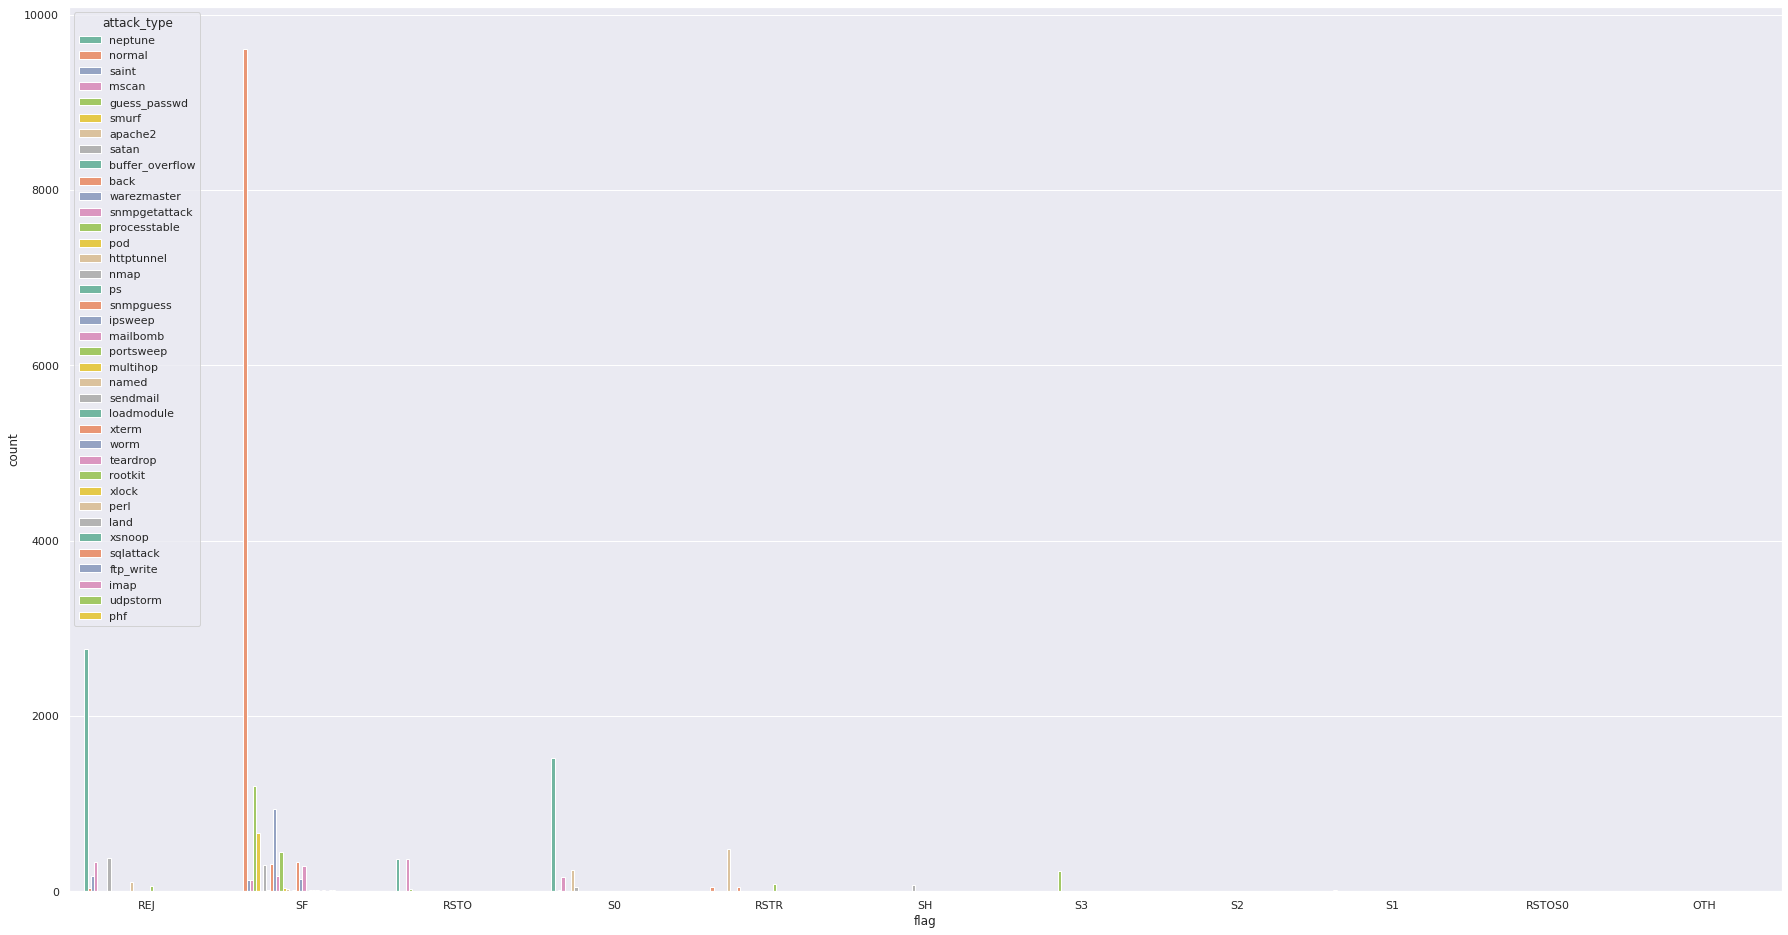

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,16.27)})
sns.countplot(x='flag',hue="attack_type",data=df_test,palette = "Set2")

Observation : The test dataset also follows the same distribution as the train data with majority of datapoints belonging to flag type "SF".

## 7. Plot between score and attack type

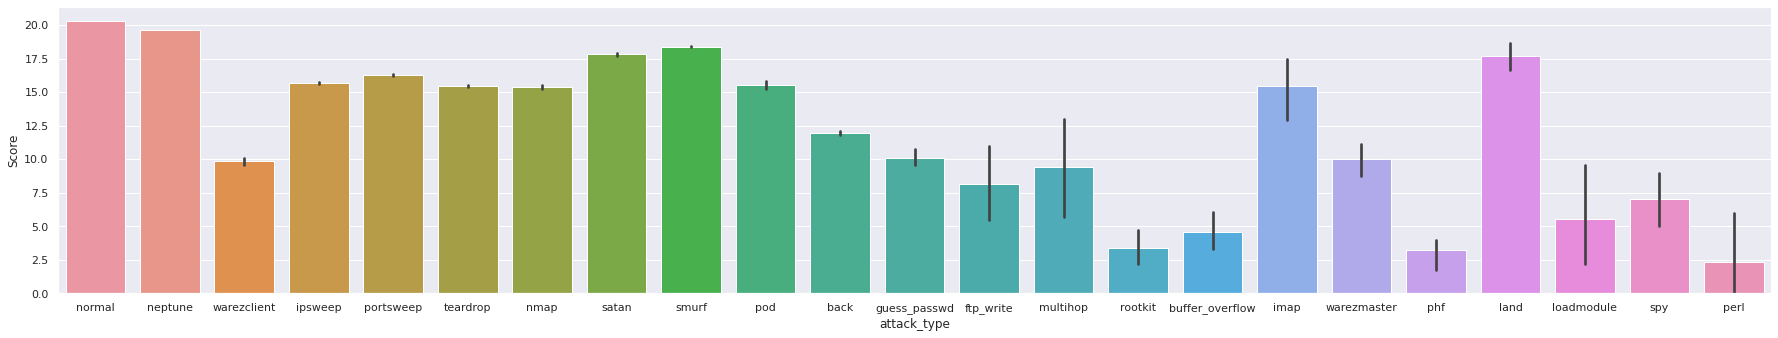

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(30.7,5.27)})
sns.barplot(x='attack_type',y='Score',data=df_train)

Observation: From the above plot we can conclude that most of the attack types belongs to score value more than 15. We will check the same for test dataset as well.

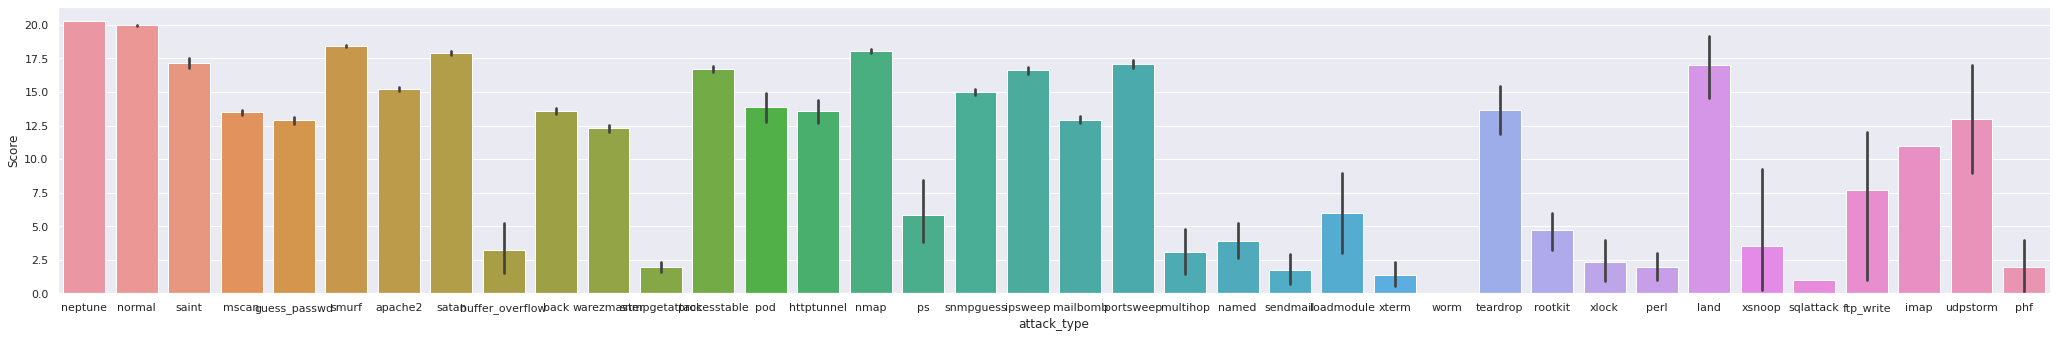

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='Score',data=df_test)

Observation: The dataset follows the same distribution as train dataset.

## 8. Plot between count and attack type

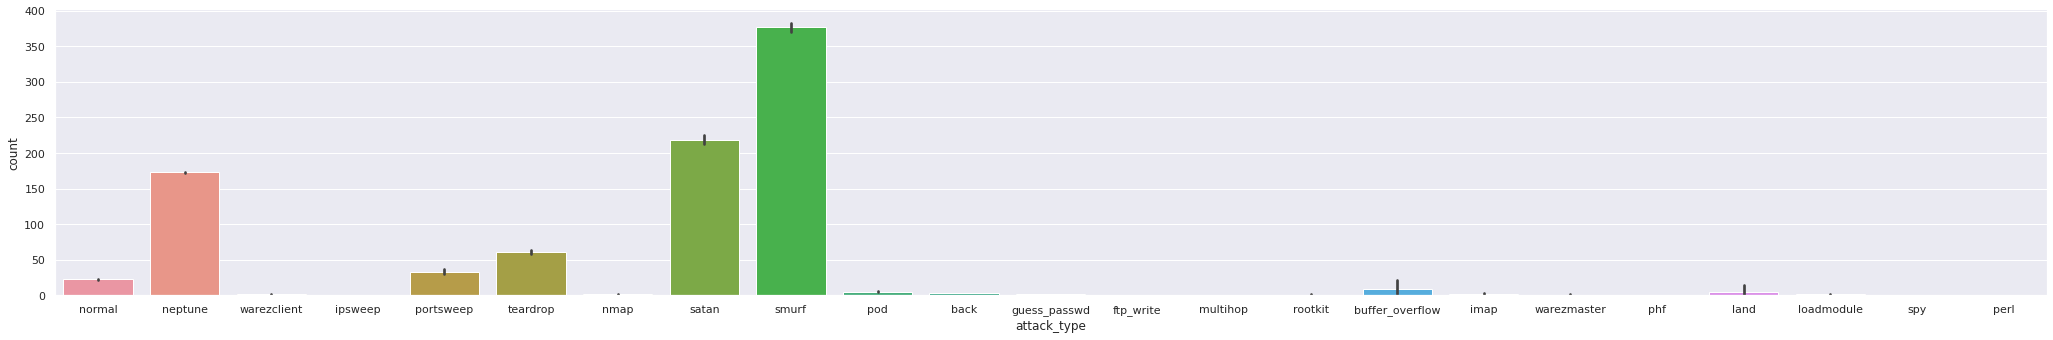

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(35.7,5.27)})
sns.barplot(x='attack_type',y='count',data=df_train)

Observation: From the above plot we can see that most of the attack types belongs to count value of less than 5. Attack type "smurf" belongs to count value greater than 350 followed by "neptune". 

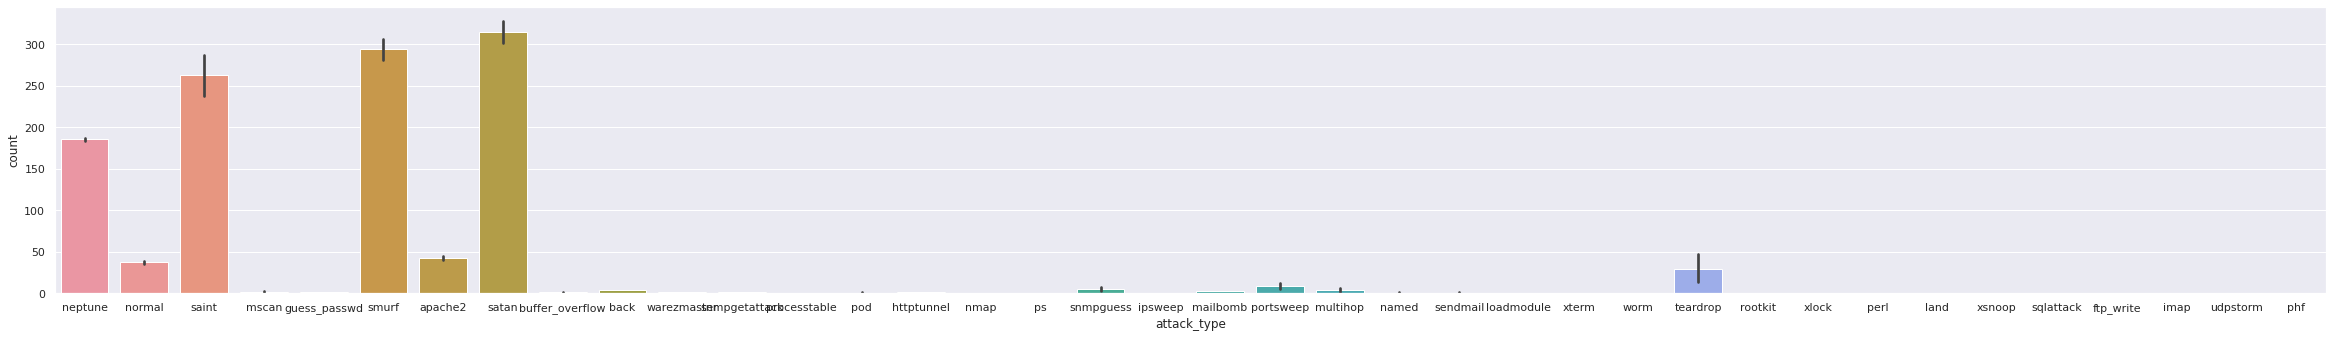

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(40.7,5.27)})
sns.barplot(x='attack_type',y='count',data=df_test)

Observation: The test data follows a different distribution for feature "count". The attack type "satan buffer" covers the highest count values(>300) followed by "smurf","saint","neptune".

# Bivariate Analysis

# Next we will check the correlation between different columns using heatmap

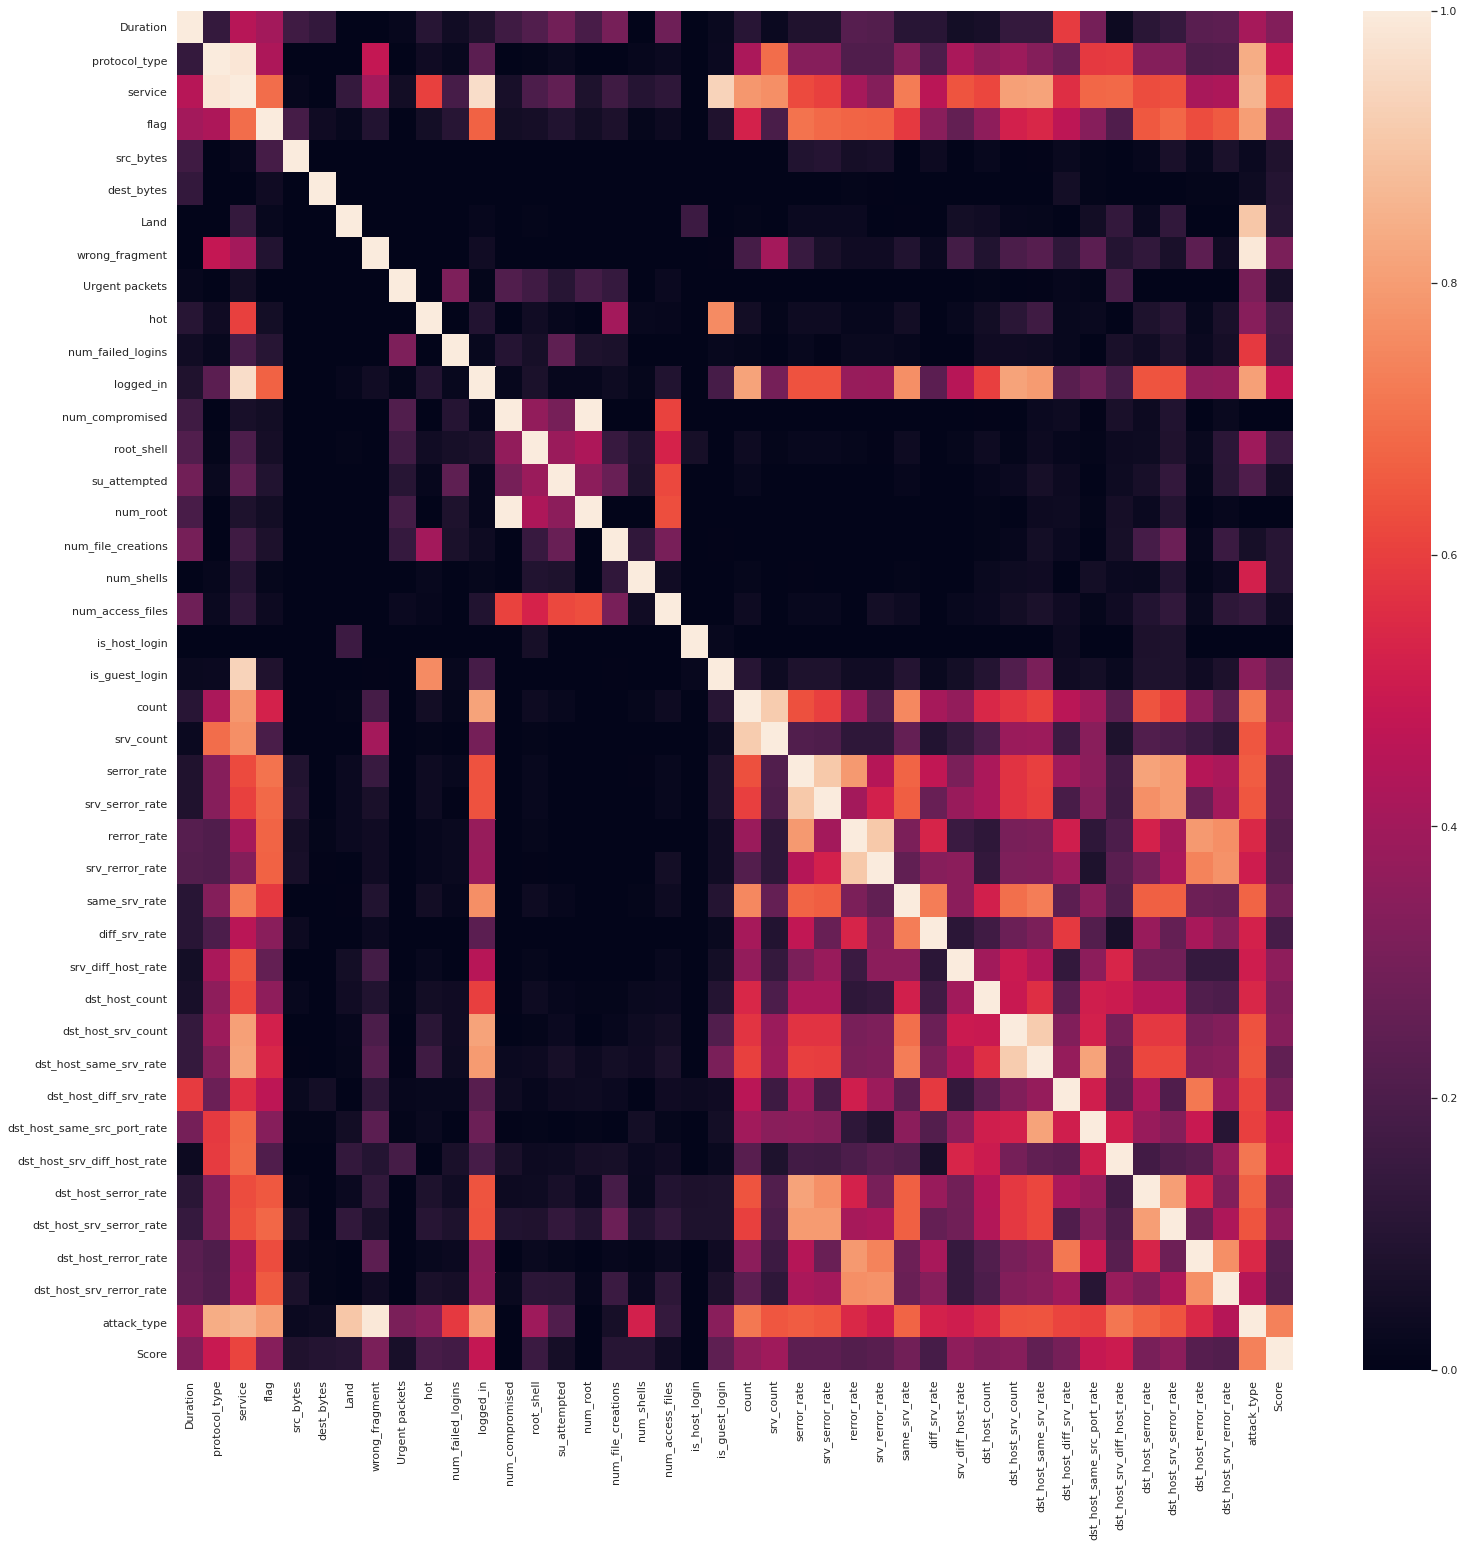

In [ ]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(corr_matrix);

In [ ]:
corr_matrix

,Duration,protocol_type,service,flag,src_bytes,dest_bytes,Land,wrong_fragment,Urgent packets,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,Score
Duration,1.000000,0.137743,0.450609,0.405342,0.164407,0.135033,0.000000,0.000000,0.015780,0.104382,0.043021,0.084503,0.165008,0.212123,0.290983,0.188257,0.304300,0.000000,0.284227,0.000000,0.024327,0.106246,0.031221,0.083085,0.082280,0.224681,0.218448,0.107083,0.108280,0.053988,0.065191,0.138973,0.137206,0.592465,0.298200,0.033399,0.110079,0.140700,0.233072,0.240959,0.410612,0.328373
protocol_type,0.137743,1.000000,0.986618,0.427788,0.000000,0.000000,0.003250,0.481678,0.000000,0.039577,0.020423,0.236025,0.000000,0.010232,0.025566,0.000000,0.000000,0.017550,0.027519,0.000000,0.027867,0.422960,0.692071,0.338454,0.338120,0.208654,0.210023,0.335598,0.201162,0.419980,0.356162,0.388230,0.333489,0.276879,0.589328,0.590744,0.334486,0.332243,0.203144,0.210402,0.839022,0.493724
service,0.450609,0.986618,1.000000,0.692821,0.017733,0.000000,0.139223,0.406253,0.050499,0.603425,0.185501,0.963961,0.063172,0.202190,0.253721,0.079027,0.167302,0.100486,0.122840,0.000000,0.933769,0.787417,0.766035,0.622845,0.603689,0.413232,0.332799,0.723524,0.458282,0.641781,0.613573,0.807590,0.815051,0.560429,0.682359,0.687488,0.626868,0.633223,0.415572,0.428705,0.857744,0.610648
flag,0.405342,0.427788,0.692821,1.000000,0.181184,0.040010,0.021895,0.093140,0.000000,0.053099,0.101978,0.671195,0.048238,0.055084,0.087764,0.048442,0.077490,0.012033,0.034412,0.000000,0.082396,0.523586,0.193628,0.704517,0.684526,0.675034,0.669159,0.587754,0.346256,0.255222,0.357977,0.521510,0.542758,0.466461,0.339359,0.208443,0.648644,0.682778,0.627790,0.654591,0.802958,0.337941
src_bytes,0.164407,0.000000,0.017733,0.181184,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087839,0.101348,0.056924,0.062774,0.000000,0.032291,0.000000,0.021536,0.000000,0.007222,0.024774,0.008196,0.000000,0.018050,0.068280,0.022896,0.072944,0.029345,0.084673
dest_bytes,0.135033,0.000000,0.000000,0.040010,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008062,0.007152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053766,0.011117,0.000000,0.000000,0.000000,0.011239,0.008128,0.035515,0.096407
Land,0.000000,0.003250,0.139223,0.021895,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.016418,0.000000,0.010377,0.000000,0.000000,0.000000,0.000000,0.000000,0.156329,0.000000,0.008160,0.000000,0.029518,0.027521,0.030723,0.000000,0.007351,0.000000,0.053866,0.043253,0.018012,0.013003,0.000000,0.048302,0.135280,0.028235,0.129478,0.000000,0.000000,0.904487,0.101963
wrong_fragment,0.000000,0.481678,0.406253,0.093140,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.045489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004933,0.182183,0.406767,0.152161,0.070087,0.039865,0.040060,0.087847,0.028463,0.177336,0.087923,0.198119,0.223740,0.123192,0.236966,0.093763,0.130825,0.068645,0.240024,0.040146,0.991632,0.310151
Urgent packets,0.015780,0.000000,0.050499,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.319470,0.011331,0.214683,0.168979,0.103699,0.178913,0.142506,0.000000,0.027927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

Observation: We can figure out the features which are strongly correlated with each other from the above matrix:
1. Protocol type and Service are highly correlated.
2. is_guest_login and Service are highly correlated.
3. dst_host_same_srv_rate and Service are highly correlated.
4. Count and logged_in are correlated.
5. num_compromised and num_root are highly correlated.
6. dst_host_same_srv_rate and dst_host_srv_count are highly correlated.

# Plotting box plot for few of the features to check for outliers.

1. Destination Bytes

<IPython.core.display.Javascript object>

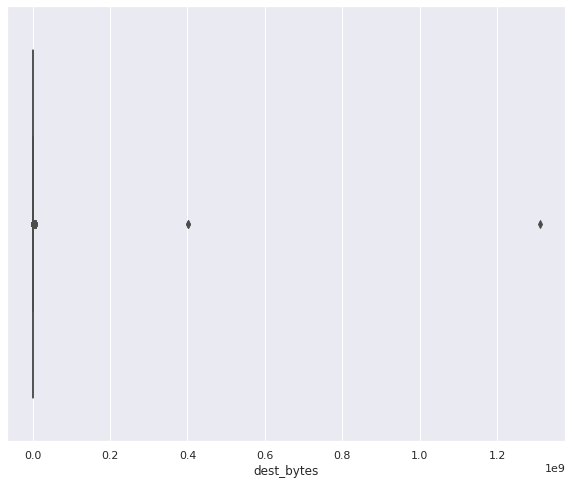

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=df_train['dest_bytes'])

The above box plot is highly skewed and also there are outliers in our data.

2. Hot

<IPython.core.display.Javascript object>

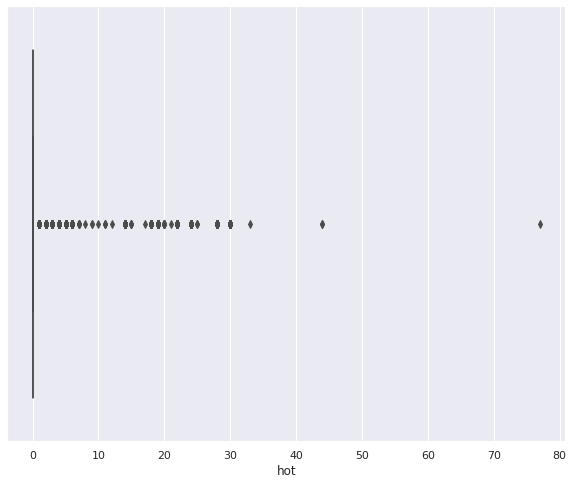

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=df_train['hot'])

We can observe a lot of outliers for this feature.

3.count

<IPython.core.display.Javascript object>

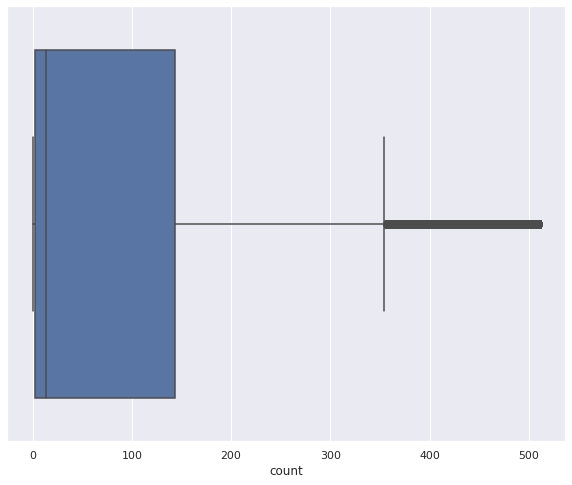

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x=df_train['count'])

The data ranges between 0 and 350. Anything apart from that can be considered as outlier

# Applying TSNE algorithm to check the distribution of data in lower dimensional space.

In [ ]:
X = df_train.drop(['attack_type','Score','protocol_type','service','flag'], axis=1)
y=df_train['attack_type']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

In [ ]:
df_train['tsne1']=tsne_repr[:, 0]

In [ ]:
df_train['tsne2']=tsne_repr[:, 1]

In [ ]:
color_dict = dict({'normal': 'blue', 'neptune': 'orange','satan': 'yellow','ipsweep':'snow','portsweep':'black','smurf':'red','nmap':'aqua','back':'indigo',
                   'teardrop':'wheat','warezclient':'purple','pod':'slateblue','guess_passwd':'pink','buffer_overflow':'ivory',
                   'warezmaster':'maroon','land':'brown','imap':'cyan','rootkit':'olive',
                   'loadmodule':'lavender','ftp_write':'dimgrey','multihop':'royalblue','phf':'lime','perl':'seagreen','spy':'bisque'})

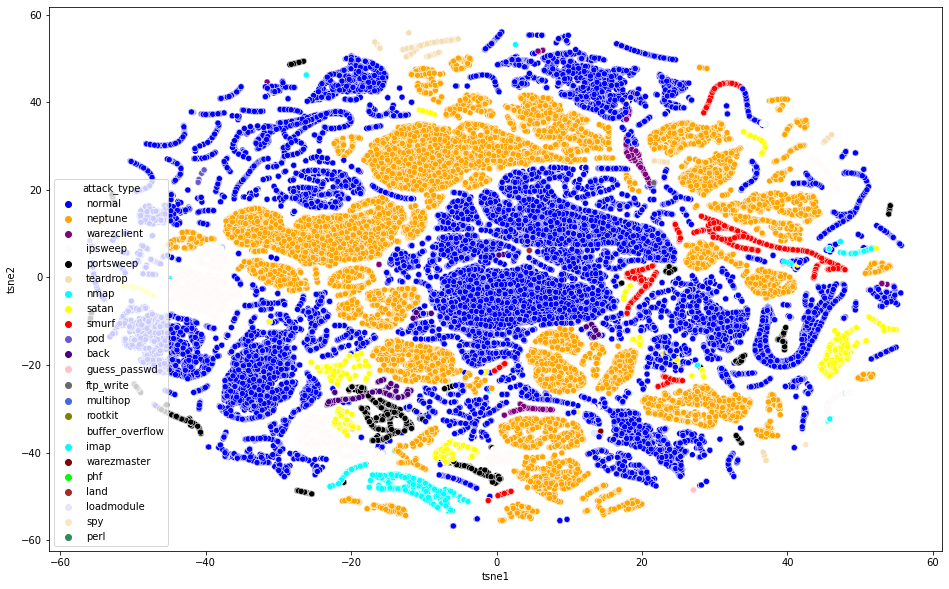

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="attack_type",
    palette=color_dict,
    data=df_train,
    legend="full",
    
)

Observation:we can conclude that the few attack types like normal, neptune,imap are fairly seperable. We do not see much overalap among most of the categories.

In [ ]:
df_train=df_train.drop(['tsne1','tsne2'],axis=1)

## Applying PCA on the dataset

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

In [ ]:
df_train['pca1']=pca_result[:, 0]
df_train['pca2']=pca_result[:, 1]
df_train['pca3']=pca_result[:, 2]


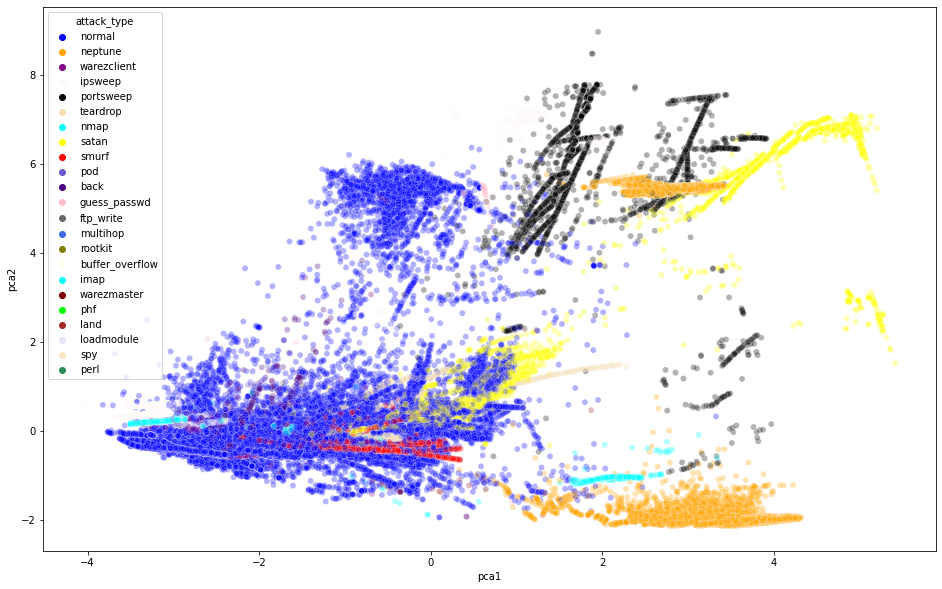

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="attack_type",
    palette=color_dict,
    data=df_train,
    legend="full",
    alpha=0.3
)

Observation:From PCA as well we can say that the class label normal and neptune are seperable in lower dimension space however other classes are overlapping..

In [ ]:
df_train=df_train.drop(['pca1','pca2','pca3'],axis=1)

## Conclusion: The dataset has few features which can be dropped and we can get rid of the outliers as well however I would like to proceed with a base model taking all the features and datapoints and evaluate the performance of it. Based on that I can then proceed with feature selection and dropping the outliers as it can be evident if the impact of outliers in the data is considerate or not.


As the different attack types belong to 4 major attack categories, lets assign the attack types to these 4 types.



https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.680.6760&rep=rep1&type=pdf#:~:text=The%20data%20in%20NSL%2DKDD,in%20weka%20tool%20%5B11%5D.

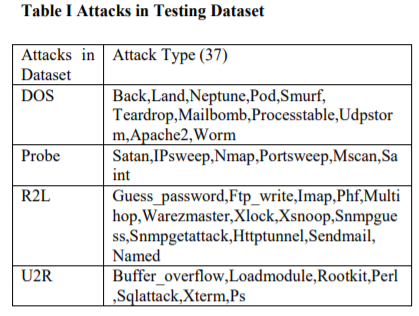

In [6]:
attack_sep={'normal':"Normal",'neptune':"DOS",
            'satan':"Probe",'ipsweep':"Probe",'named':"R2L",
            'ps':"U2R",'sendmail':"R2L",'xterm':"U2R",'xlock':"R2L",
            'xsnoop':"R2L",'udpstorm':"DOS",'sqlattack':"U2R",'worm':"DOS",'portsweep':"Probe",
            'smurf':"DOS",'nmap':"Probe",'back':"DOS",'mscan':"Probe",'apache2':"DOS",'processtable':"DOS",
            'snmpguess':"R2L",'saint':"Probe",'mailbomb':"DOS",'snmpgetattack':"R2L",'httptunnel':"R2L",'teardrop':"DOS",
            'warezclient':"R2L",'pod':"DOS",'guess_passwd':"R2L",'buffer_overflow':"U2R",'warezmaster':"R2L",'land':"DOS",'imap':"R2L",
            'rootkit':"U2R",'loadmodule':"U2R",'ftp_write':"R2L",'multihop':"R2L",'phf':"R2L",'perl':"U2R",'spy':"R2L"}

In [7]:
df_train.replace({'attack_type':attack_sep},inplace=True)

In [8]:
df_test.replace({'attack_type':attack_sep},inplace=True)

# Lets train a base model on the entire dataset and evaluate the performance.

In [9]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df_train['protocol_type']= label_encoder.fit_transform(df_train['protocol_type']) 
df_test['protocol_type']= label_encoder.transform(df_test['protocol_type']) 

label_encoder = preprocessing.LabelEncoder() 
  
df_train['service']= label_encoder.fit_transform(df_train['service']) 
df_test['service']= label_encoder.transform(df_test['service']) 

label_encoder = preprocessing.LabelEncoder() 

df_train['flag']= label_encoder.fit_transform(df_train['flag']) 
df_test['flag']= label_encoder.transform(df_test['flag']) 

In [15]:
y=df_train['attack_type']
X=df_train.drop(['attack_type'],axis=1)

y_test=df_test['attack_type']
X_test=df_test.drop(['attack_type'],axis=1)


In [11]:
sc = StandardScaler()  #standardizing the data
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test)

# Lets build a base model on our dataset

In [12]:
def falseposrate(conf_matrix,y_test,pred):
  FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix) 
  FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
  TP = np.diag(conf_matrix)
  TN = conf_matrix.sum() - (FP + FN + TP)
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  FPR = FP/(FP+TN)
  recall = recall_score(y_test, pred,average='micro')
  precision = precision_score(y_test, pred,average='micro')
  return FPR,recall,precision


Accuracy : 0.7814399148294371
F1 score : 0.7814399148294371


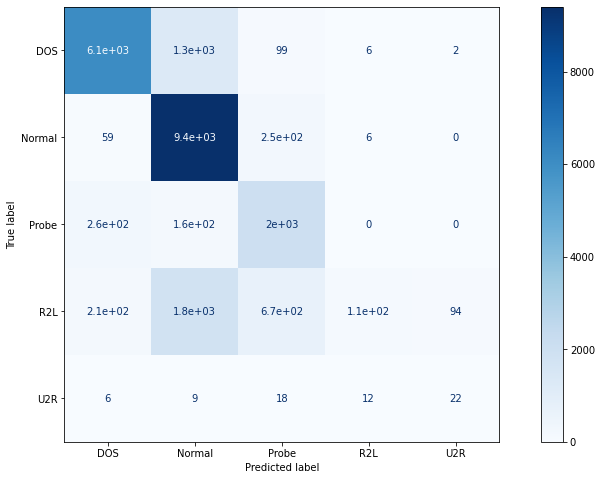

__________________________________________________
[[6089 1263   99    6    2]
 [  59 9400  246    6    0]
 [ 263  164 1994    0    0]
 [ 211 1797  672  111   94]
 [   6    9   18   12   22]]
|False positive Rate :|
[0.03573323 0.25194825 0.05143624 0.00122088 0.00427122]
|Precision:|
0.7814399148294371
|recall:|
0.7814399148294371
|Classification report|
              precision    recall  f1-score   support

         DOS       0.92      0.82      0.86      7459
      Normal       0.74      0.97      0.84      9711
       Probe       0.66      0.82      0.73      2421
         R2L       0.82      0.04      0.07      2885
         U2R       0.19      0.33      0.24        67

    accuracy                           0.78     22543
   macro avg       0.67      0.59      0.55     22543
weighted avg       0.80      0.78      0.74     22543



In [ ]:
%matplotlib inline
clf= svm.SVC(kernel='linear',probability=True)
clf.fit(X_train,y)
pred = clf.predict(X_test)
recall = recall_score(y_test, pred,average='micro')
precision = precision_score(y_test, pred,average='micro')
score = metrics.accuracy_score(y_test, pred)
f1score= f1_score(y_test, pred, average='micro')
print("Accuracy :",score)
print('=' * 50)
print("F1 score :",f1score)

cnf_matrix = confusion_matrix(y_test, pred)
#sns.heatmap(cnf_matrix)
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(clf, X_test, y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

print('_' * 50)
print(cnf_matrix)

FPR= falseposrate(cnf_matrix)
print('=' * 50)
print("|False positive Rate :|")
print('=' * 50)
print(FPR)
print('=' * 50)
print("|Precision:|")
print('=' * 50)
print(precision)
print('=' * 50)
print("|recall:|")
print('=' * 50)
print( recall)
print('=' * 50)
print("|Classification report|")
print('=' * 50)
print(metrics.classification_report(y_test,pred))


Our model is giving 78% F1 score. Lets see if we can improve the performnace.

# Lets try to improve our model performance.

# Lets apply some feature selection techniques on our datasets and analyze the performance.

## Coorelation based feature Selection( CFS)

In [ ]:
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.5]

Lets look at the features which are highly correlated with each other.

In [ ]:
new_df= df_train[relevant_features.index]
new_df_test= df_test[relevant_features.index]

In [ ]:
y_cfs=new_df['attack_type']
X_cfs=new_df.drop(['attack_type'],axis=1)

y_test_cfs=new_df_test['attack_type']
X_test_cfs=new_df_test.drop(['attack_type'],axis=1)

In [ ]:
sc = StandardScaler()
X_train_cfs = sc.fit_transform(X_cfs)
X_test_cfs = sc.transform(X_test_cfs)

In [31]:
pip install catboost

In [35]:
from catboost import CatBoostClassifier


In [ ]:
def training(clf,xtrain,xtest,ytrain,ytest,attack_type):
    print('\n')
    print('=' * 50)
    print("Training ",attack_type)
    print(clf)
    clf.fit(xtrain, ytrain)
    print('_' * 50)
    pred = clf.predict(xtest)
    print('_' * 50)
    roc = roc_auc_score(ytest, clf.predict_proba(xtest), multi_class='ovo', average='weighted')
    score = metrics.accuracy_score(ytest, pred)
    f1score= f1_score(ytest, pred, average='micro')
    print("accuracy:   %0.3f" % score)
    print()
    print('_' * 50)
    print("|classification report|")
    print('_' * 50)
    print(metrics.classification_report(ytest, pred))
    print('_' * 50)
    print("confusion matrix:")
    print(metrics.confusion_matrix(ytest, pred))
    cm= metrics.confusion_matrix(ytest, pred)
    print()
    print('_' * 50)
    print("ROC AUC Score :",roc)
    FPR,precision,recall= falseposrate(cm,ytest,pred)
    print('_' * 50)
    print("False Positive Rate is :",FPR)
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score, f1score,roc,FPR,precision,recall



In [ ]:
results_CFS= []

for clf, name in (
        (GaussianNB() ,"Naive Bayes"),
        (KNeighborsClassifier(n_neighbors = 7),"KNN"),
        (OneVsRestClassifier(svm.SVC(probability=True)),"One vs Rest SVM "),
        (RandomForestClassifier(), "Random forest"),(DecisionTreeClassifier(random_state=0),"Decision Tree"),
        (XGBClassifier(),"XGBOOST"),(svm.SVC(kernel='linear',probability=True),"SVM Linear"),
        (CatBoostClassifier(iterations=5,learning_rate=0.1),"CAT Boost")):
    print('=' * 80)
    print(name)

    results_CFS.append(training(clf,X_train_cfs,X_test_cfs,y_cfs,y_test_cfs,"CFS"))
    

Naive Bayes


Training  CFS
GaussianNB(priors=None, var_smoothing=1e-09)
__________________________________________________
__________________________________________________
accuracy:   0.575

__________________________________________________
|classification report|
__________________________________________________
              precision    recall  f1-score   support

         DOS       0.82      0.30      0.44      7459
      Normal       0.87      0.74      0.80      9711
       Probe       0.31      0.94      0.47      2421
         R2L       0.53      0.42      0.47      2885
         U2R       0.03      0.75      0.05        67

    accuracy                           0.57     22543
   macro avg       0.51      0.63      0.45     22543
weighted avg       0.75      0.57      0.60     22543

__________________________________________________
confusion matrix:
[[2259 1017 3719  285  179]
 [ 443 7162  741  771  594]
 [  55    3 2272   10   81]
 [   5   45  581 1219 1035]
 [   1    

In [ ]:
results_total= []

for clf, name in (
        (GaussianNB() ,"Naive Bayes"),
        (KNeighborsClassifier(n_neighbors = 7),"KNN"),
        (OneVsRestClassifier(svm.SVC(probability=True)),"One vs Rest SVM "),
        (RandomForestClassifier(), "Random forest"),(DecisionTreeClassifier(random_state=0),"Decision Tree"),
        (XGBClassifier(),"XGBOOST"),
        (CatBoostClassifier(iterations=5,learning_rate=0.1),"CAT Boost")):
    print('=' * 80)
    print(name)
    results_total.append(training(clf,X_train,X_test,y,y_test,"Total"))
    

Naive Bayes


Training  Total
GaussianNB(priors=None, var_smoothing=1e-09)
__________________________________________________
__________________________________________________
accuracy:   0.443

__________________________________________________
|classification report|
__________________________________________________
              precision    recall  f1-score   support

         DOS       0.43      0.82      0.56      7459
      Normal       0.81      0.07      0.13      9711
       Probe       0.51      0.95      0.66      2421
         R2L       0.58      0.29      0.39      2885
         U2R       0.03      0.61      0.06        67

    accuracy                           0.44     22543
   macro avg       0.47      0.55      0.36     22543
weighted avg       0.62      0.44      0.36     22543

__________________________________________________
confusion matrix:
[[6106  133  996  203   21]
 [7629  702  786  396  198]
 [ 126    0 2288    0    7]
 [ 454   27  428  843 1133]
 [   4  

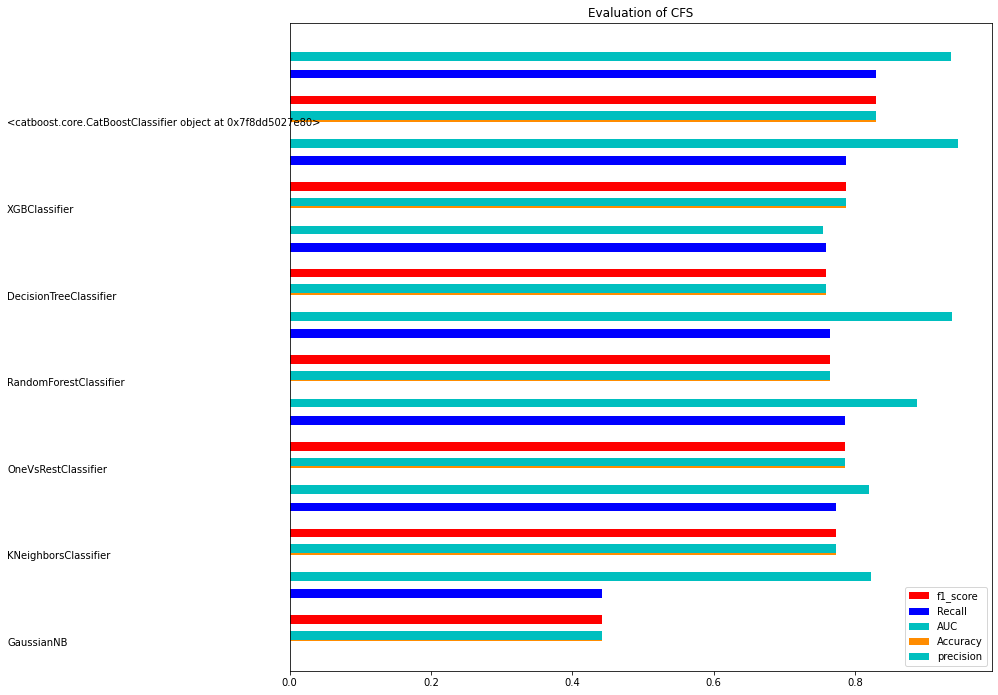

accuracy for Total
{'GaussianNB': 0.4427094885330258, 'KNeighborsClassifier': 0.7729672182052079, 'OneVsRestClassifier': 0.7857428026438362, 'RandomForestClassifier': 0.7650268375992547, 'DecisionTreeClassifier': 0.7596149580801136, 'XGBClassifier': 0.7876502683759925, '<catboost.core.CatBoostClassifier object at 0x7f8dd5027e80>': 0.8298806724925698}
 auc score 
{'GaussianNB': 0.8224489673751717, 'KNeighborsClassifier': 0.8194258504278626, 'OneVsRestClassifier': 0.8873746618781576, 'RandomForestClassifier': 0.9378525909173224, 'DecisionTreeClassifier': 0.7546207396595375, 'XGBClassifier': 0.9465377507943031, '<catboost.core.CatBoostClassifier object at 0x7f8dd5027e80>': 0.9359207082637293}
F1 score 
{'GaussianNB': 0.4427094885330258, 'KNeighborsClassifier': 0.7729672182052079, 'OneVsRestClassifier': 0.7857428026438362, 'RandomForestClassifier': 0.7650268375992547, 'DecisionTreeClassifier': 0.7596149580801136, 'XGBClassifier': 0.7876502683759925, '<catboost.core.CatBoostClassifier objec

In [ ]:
%matplotlib inline
indices = np.arange(len(results_total))

results = [[x[i] for x in results_total] for i in range(7)]

clf_names, score,f1score, auc,fpr1,precision,recall = results
plt.figure(figsize=(15, 10))
plt.title("Evaluation of CFS")
plt.barh(indices+.3, f1score, .1, label="f1_score", color='red')
plt.barh(indices+.6, recall, .1, label="Recall", color='blue')
plt.barh(indices+.8, auc, .1, label="AUC", color='c')
plt.barh(indices+.10, score, .1, label="Accuracy", color='darkorange')
plt.barh(indices+.12, precision, .1, label="precision", color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)

plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
  if c == '<catboost.core.CatBoostClassifier object at 0x7fbf12ccd048>':
    plt.text(-.4, i, 'catboost')
  else:

    plt.text(-.4, i, c)

plt.show()
dic={}
auc_dic={}
f1_dic={}
rec={}
prec={}
fpr_={}
for key in clf_names: 
    for value in score: 
        dic[key] = value 
        score.remove(value) 
        break

for key in clf_names: 
    for value in f1score: 
        f1_dic[key] = value 
        f1score.remove(value) 
        break

for key in clf_names: 
    for value in auc: 
        auc_dic[key] = value 
        auc.remove(value) 
        break
for key in clf_names: 
    for value in recall: 
        rec[key] = value 
        recall.remove(value) 
        break

for key in clf_names: 
    for value in precision: 
        prec[key] = value 
        precision.remove(value) 
        break
for key in clf_names: 
    for value in fpr1: 
        fpr_[key] = value 
        fpr1.remove(value) 
        break
print("accuracy for Total",)        
print(dic)
print("="*300)
print(" auc score ",)
print(auc_dic)
print("="*300)
print("F1 score ",)
print(f1_dic)
print("="*300)
print("Recall ",)
print(rec)
print("="*300)
print("Precision ",)
print(prec)
print("="*300)
print("FPR")
print(fpr_)

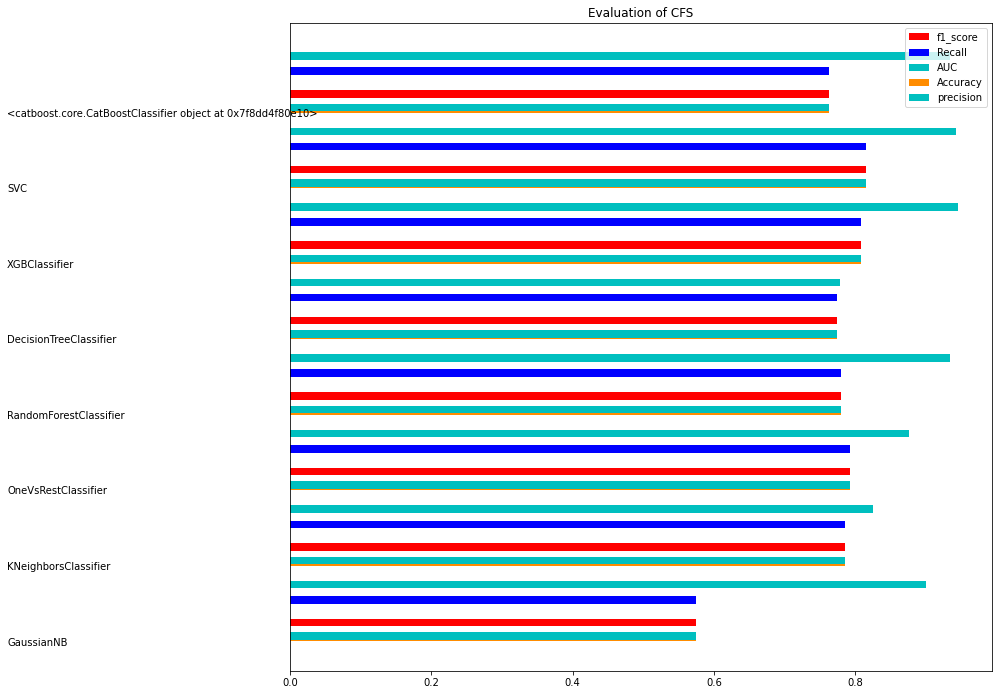

accuracy for CFS
{'GaussianNB': 0.5749900190746573, 'KNeighborsClassifier': 0.785920241316595, 'OneVsRestClassifier': 0.7929290688905647, 'RandomForestClassifier': 0.7798873264427982, 'DecisionTreeClassifier': 0.7738100519008118, 'XGBClassifier': 0.8081887947478152, 'SVC': 0.8154637803309231, '<catboost.core.CatBoostClassifier object at 0x7f8dd4f80e10>': 0.7632080912034778}
 auc score 
{'GaussianNB': 0.9000004552508875, 'KNeighborsClassifier': 0.8255302929150314, 'OneVsRestClassifier': 0.8763129178082396, 'RandomForestClassifier': 0.9339545688912001, 'DecisionTreeClassifier': 0.7779567263844044, 'XGBClassifier': 0.9460025287118801, 'SVC': 0.9426703859258906, '<catboost.core.CatBoostClassifier object at 0x7f8dd4f80e10>': 0.934186036247367}
F1 score 
{'GaussianNB': 0.5749900190746573, 'KNeighborsClassifier': 0.7859202413165951, 'OneVsRestClassifier': 0.7929290688905646, 'RandomForestClassifier': 0.7798873264427982, 'DecisionTreeClassifier': 0.7738100519008118, 'XGBClassifier': 0.80818879

In [ ]:
%matplotlib inline
indices = np.arange(len(results_CFS))

results = [[x[i] for x in results_CFS] for i in range(7)]

clf_names, score,f1score, auc,fpr2,precision,recall = results
plt.figure(figsize=(15, 10))
plt.title("Evaluation of CFS")
plt.barh(indices+.3, f1score, .1, label="f1_score", color='red')
plt.barh(indices+.6, recall, .1, label="Recall", color='blue')
plt.barh(indices+.8, auc, .1, label="AUC", color='c')
plt.barh(indices+.10, score, .1, label="Accuracy", color='darkorange')
plt.barh(indices+.12, precision, .1, label="precision", color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)

plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
  if c == '<catboost.core.CatBoostClassifier object at 0x7fbf12ccd048>':
    plt.text(-.4, i, 'catboost')
  else:

    plt.text(-.4, i, c)

plt.show()
dic={}
auc_dic={}
f1_dic={}
rec={}
prec={}
fpr_={}
for key in clf_names: 
    for value in score: 
        dic[key] = value 
        score.remove(value) 
        break

for key in clf_names: 
    for value in f1score: 
        f1_dic[key] = value 
        f1score.remove(value) 
        break

for key in clf_names: 
    for value in auc: 
        auc_dic[key] = value 
        auc.remove(value) 
        break
for key in clf_names: 
    for value in recall: 
        rec[key] = value 
        recall.remove(value) 
        break

for key in clf_names: 
    for value in precision: 
        prec[key] = value 
        precision.remove(value) 
        break
for key in clf_names: 
    for value in fpr2: 
        fpr_[key] = value 
        fpr2.remove(value) 
        break
print("accuracy for CFS",)        
print(dic)
print("="*300)
print(" auc score ",)
print(auc_dic)
print("="*300)
print("F1 score ",)
print(f1_dic)
print("="*300)
print("Recall ",)
print(rec)
print("="*300)
print("Precision ",)
print(prec)
print("="*300)
print("FPR")
print(fpr_)

# Lets try other feature selection technique: Information Gain

In [14]:
res = mutual_info_classif(X, y, random_state=0)
print('MI for DOS',res)

MI for DOS [5.60891581e-02 9.41732454e-02 5.96789089e-01 5.03362363e-01
 7.14220225e-01 4.60851741e-01 1.35114364e-03 7.50106922e-03
 5.59993688e-04 2.37759630e-02 3.15067998e-04 3.08762358e-01
 4.84838963e-03 4.13523727e-03 1.66985886e-03 2.69938844e-03
 3.10810832e-03 0.00000000e+00 3.06829506e-03 0.00000000e+00
 2.31300122e-04 1.32124354e-02 4.13723831e-01 1.61766240e-01
 3.85008885e-01 3.59593584e-01 7.55124668e-02 5.32134874e-02
 4.64974905e-01 5.06259541e-01 1.45437440e-01 2.12326115e-01
 4.16896229e-01 4.02922770e-01 4.51520418e-01 2.38659616e-01
 2.61349633e-01 3.99080204e-01 3.74271778e-01 9.75456990e-02
 8.40648944e-02 2.67804019e-01]


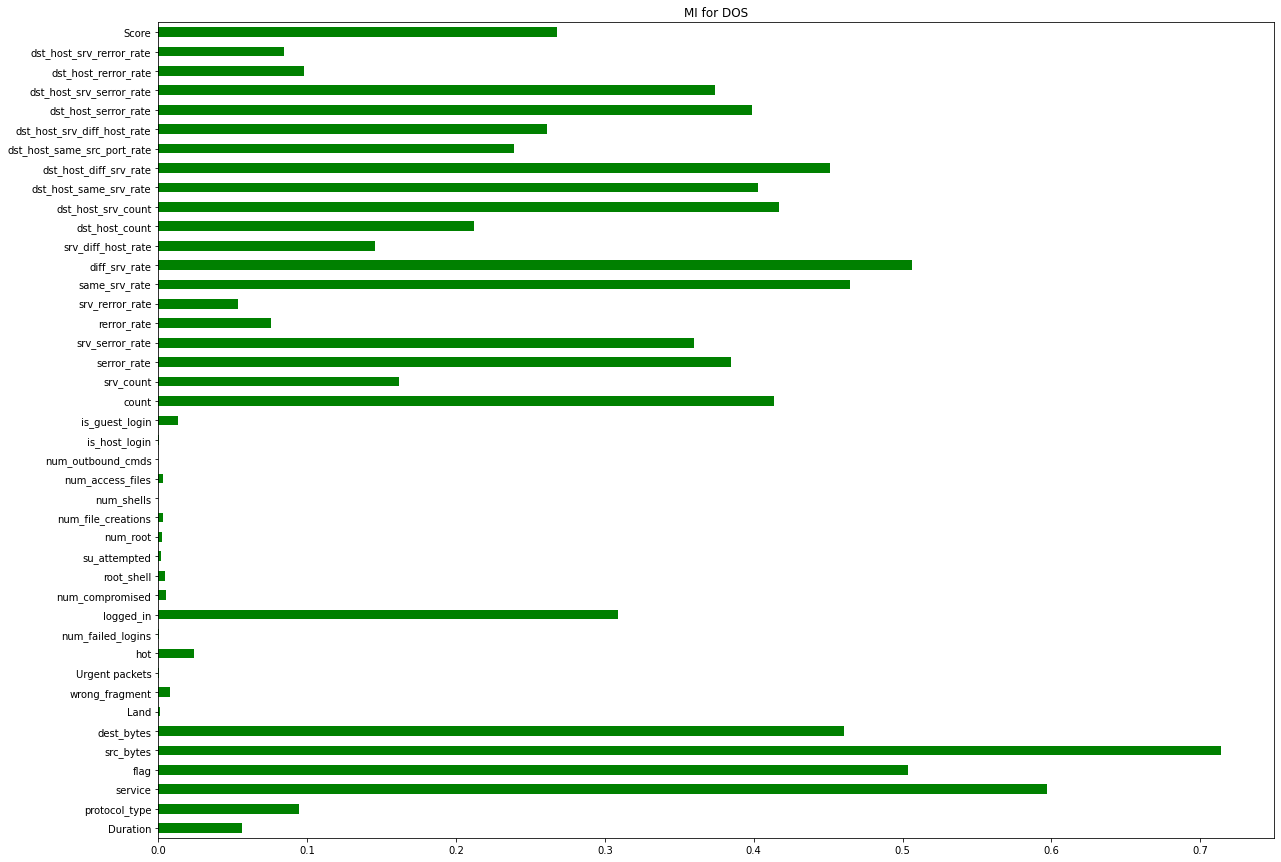

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,15))
feature_importance=pd.Series(res,X.columns[0:len(X.columns)])
feature_importance.plot(kind='barh',color='green')
plt.title("MI for DOS")

plt.show()

In [16]:
X_=X.drop(['Land','wrong_fragment','Urgent packets','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_rerror_rate','Duration'],axis=1)

In [17]:
X_test_=X_test.drop(['Land','wrong_fragment','Urgent packets','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','srv_rerror_rate','Duration'],axis=1)

In [ ]:
sc = StandardScaler()
X_train_mi = sc.fit_transform(X_)
X_test_mi = sc.transform(X_test_)

In [ ]:
results_mi= []

for clf, name in (
        (GaussianNB() ,"Naive Bayes"),
        (KNeighborsClassifier(n_neighbors = 7),"KNN"),
        (OneVsRestClassifier(svm.SVC(probability=True)),"One vs Rest SVM "),
        (RandomForestClassifier(), "Random forest"),(DecisionTreeClassifier(random_state=0),"Decision Tree"),
        (XGBClassifier(),"XGBOOST"),
        (CatBoostClassifier(iterations=5,learning_rate=0.1),"CAT Boost")):
    print('=' * 80)
    print(name)
    results_mi.append(training(clf,X_train_mi,X_test_mi,y,y_test,"Mutual Info"))
    

Naive Bayes


Training  Mutual Info
GaussianNB(priors=None, var_smoothing=1e-09)
__________________________________________________
__________________________________________________
accuracy:   0.719

__________________________________________________
|classification report|
__________________________________________________
              precision    recall  f1-score   support

         DOS       0.91      0.76      0.82      7459
      Normal       0.77      0.85      0.81      9711
       Probe       0.80      0.74      0.77      2421
         R2L       0.64      0.17      0.27      2885
         U2R       0.02      0.66      0.03        67

    accuracy                           0.72     22543
   macro avg       0.63      0.63      0.54     22543
weighted avg       0.80      0.72      0.74     22543

__________________________________________________
confusion matrix:
[[5638 1311  139  115  256]
 [ 391 8220  221  123  756]
 [  96  214 1796   19  296]
 [  95  874   84  501 1331]
 [

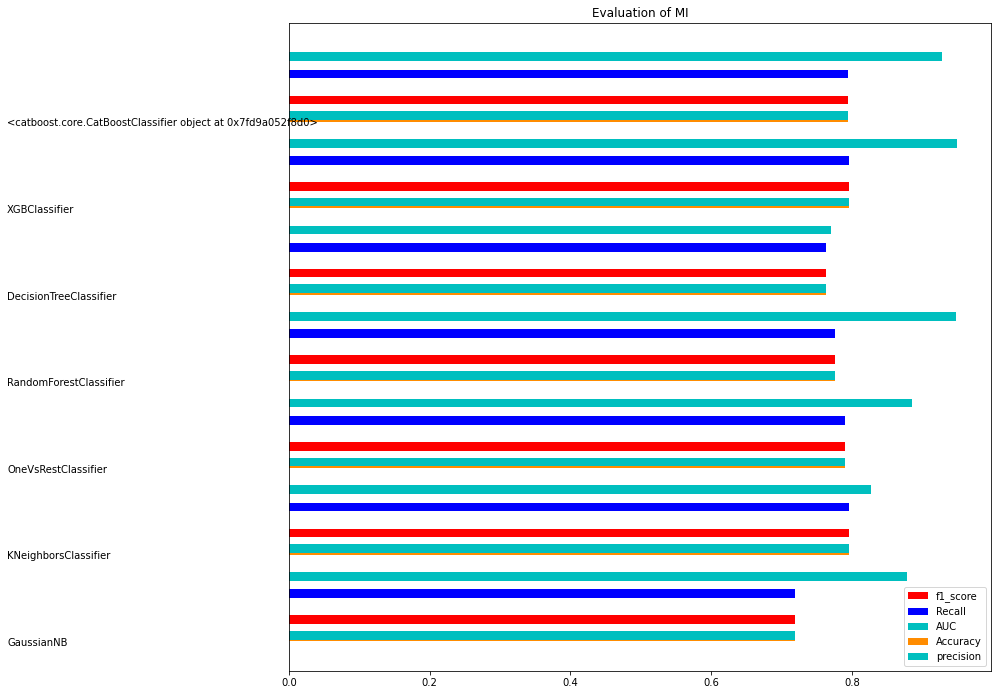

accuracy for MI
{'GaussianNB': 0.7185822650046577, 'KNeighborsClassifier': 0.7952801313046178, 'OneVsRestClassifier': 0.7905336468083218, 'RandomForestClassifier': 0.775318280619261, 'DecisionTreeClassifier': 0.7623652575078739, 'XGBClassifier': 0.7955019296455662, '<catboost.core.CatBoostClassifier object at 0x7fd9a052f8d0>': 0.7940824202634964}
 auc score 
{'GaussianNB': 0.8785615943609304, 'KNeighborsClassifier': 0.8270477270114357, 'OneVsRestClassifier': 0.884625201462047, 'RandomForestClassifier': 0.9477763317193189, 'DecisionTreeClassifier': 0.7698811132942461, 'XGBClassifier': 0.9495154436631293, '<catboost.core.CatBoostClassifier object at 0x7fd9a052f8d0>': 0.9271759943969768}
F1 score 
{'GaussianNB': 0.7185822650046577, 'KNeighborsClassifier': 0.7952801313046179, 'OneVsRestClassifier': 0.7905336468083218, 'RandomForestClassifier': 0.775318280619261, 'DecisionTreeClassifier': 0.7623652575078739, 'XGBClassifier': 0.7955019296455662, '<catboost.core.CatBoostClassifier object at 0

In [ ]:
%matplotlib inline
indices = np.arange(len(results_mi))

results = [[x[i] for x in results_mi] for i in range(7)]

clf_names, score,f1score, auc,fpr2,precision,recall = results
plt.figure(figsize=(15, 10))
plt.title("Evaluation of MI")
plt.barh(indices+.3, f1score, .1, label="f1_score", color='red')
plt.barh(indices+.6, recall, .1, label="Recall", color='blue')
plt.barh(indices+.8, auc, .1, label="AUC", color='c')
plt.barh(indices+.10, score, .1, label="Accuracy", color='darkorange')
plt.barh(indices+.12, precision, .1, label="precision", color='c')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)

plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
  if c == '<catboost.core.CatBoostClassifier object at 0x7fbf12ccd048>':
    plt.text(-.4, i, 'catboost')
  else:

    plt.text(-.4, i, c)

plt.show()
dic={}
auc_dic={}
f1_dic={}
rec={}
prec={}
fpr_={}
for key in clf_names: 
    for value in score: 
        dic[key] = value 
        score.remove(value) 
        break

for key in clf_names: 
    for value in f1score: 
        f1_dic[key] = value 
        f1score.remove(value) 
        break

for key in clf_names: 
    for value in auc: 
        auc_dic[key] = value 
        auc.remove(value) 
        break
for key in clf_names: 
    for value in recall: 
        rec[key] = value 
        recall.remove(value) 
        break

for key in clf_names: 
    for value in precision: 
        prec[key] = value 
        precision.remove(value) 
        break
for key in clf_names: 
    for value in fpr2: 
        fpr_[key] = value 
        fpr2.remove(value) 
        break
print("accuracy for MI",)        
print(dic)
print("="*300)
print(" auc score ",)
print(auc_dic)
print("="*300)
print("F1 score ",)
print(f1_dic)
print("="*300)
print("Recall ",)
print(rec)
print("="*300)
print("Precision ",)
print(prec)
print("="*300)
print("FPR")
print(fpr_)

## Tabulating my results

In [ ]:
from tabulate import tabulate
print("="*50)
print("|Tabulated Result|")
print("="*50)
data = [[1, 'Gaussian NB', 0.44,0.82,0.44],
[2, 'K Nearest Neighbour', 0.77,0.81,0.77],
[3, 'OnevsRest Classifier', 0.78,0.88,0.78],
[4,'Random Forest', 0.76,0.93,0.76],
[5,'Decision Tree', 0.75,0.75,0.75],
[6,'XGB Classifier', 0.78,0.94,0.78],
[7,'Catboost Classifier', 0.82,0.93,0.82],

] 
print("Report on Total Data")
print("="*80)
print (tabulate(data, headers=["S.No", "Classifier", "Accuracy","AUC"," F1 Score"],tablefmt="psql"))


data_1 = [[1, 'Gaussian NB', 0.57,0.90,0.57],
[2, 'K Nearest Neighbour', 0.78,0.82,0.78],
[3, 'OnevsRest Classifier', 0.79,0.87,0.79],
[4,'Random Forest', 0.78,0.93,0.78],
[5,'Decision Tree', 0.77,0.77,0.77],
[6,'XGB Classifier', 0.80,0.94,0.80],
[7,'Catboost Classifier', 0.76,0.93,0.76]] 
print("Correlation based feature selection")
print("="*80)
print (tabulate(data_1, headers=["S.No", "Classifier", "Accuracy","AUC","F1 Score"],tablefmt="psql"))




data_2 = [[1, 'Gaussian NB', 0.71,0.87,0.71],
[2, 'K Nearest Neighbour', 0.79,0.82,0.79],
[3, 'OnevsRest Classifier', 0.79,0.88,0.79],
[4,'Random Forest', 0.77,0.94,0.77],
[5,'Decision Tree', 0.76,0.76,0.76],
[6,'XGB Classifier', 0.79,0.94,0.79],
[7,'Catboost Classifier', 0.79,0.92,0.79]] 
print("Mutual Information based feature selection")
print("="*80)
print (tabulate(data_2, headers=["S.No", "Classifier", "Accuracy","AUC","F1 Score"],tablefmt="psql"))


|Tabulated Result|
Report on Total Data
+--------+----------------------+------------+-------+-------------+
|   S.No | Classifier           |   Accuracy |   AUC |    F1 Score |
|--------+----------------------+------------+-------+-------------|
|      1 | Gaussian NB          |       0.44 |  0.82 |        0.44 |
|      2 | K Nearest Neighbour  |       0.77 |  0.81 |        0.77 |
|      3 | OnevsRest Classifier |       0.78 |  0.88 |        0.78 |
|      4 | Random Forest        |       0.76 |  0.93 |        0.76 |
|      5 | Decision Tree        |       0.75 |  0.75 |        0.75 |
|      6 | XGB Classifier       |       0.78 |  0.94 |        0.78 |
|      7 | Catboost Classifier  |       0.82 |  0.93 |        0.82 |
+--------+----------------------+------------+-------+-------------+
Correlation based feature selection
+--------+----------------------+------------+-------+------------+
|   S.No | Classifier           |   Accuracy |   AUC |   F1 Score |
|--------+-------------------

## MI is behaving best hence we will go with MI features.

## Conclusion:


## From the above we can conclude the following:
1. Mutual Information based feature selection is giving better F1 score and reduced False positive rate. Next we will tune our models on the updated dataset along with removing outliers and evaluate our performance.

# Custom classification

# Lets try the same after removing outliers.

In [18]:
Xnew= pd.concat([X_,y],axis=1)

In [19]:
Xnew_test= pd.concat([X_test_,y_test],axis=1)

In [20]:
Q1 = Xnew.quantile(0.05)
Q3 = Xnew.quantile(0.95)
IQR = Q3 - Q1

new_df_ = Xnew[~((Xnew < (Q1 - 1.5 * IQR)) |(Xnew > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1 = Xnew_test.quantile(0.05)
Q3 = Xnew_test.quantile(0.95)
IQR = Q3 - Q1

new_df_test_ = Xnew_test[~((Xnew_test < (Q1 - 1.5 * IQR)) |(Xnew_test > (Q3 + 1.5 * IQR))).any(axis=1)]

new_df_ = new_df_.reset_index()
del new_df_['index']
new_df_test_ = new_df_test_.reset_index()
del new_df_test_['index']

In [21]:
y_oltr=new_df_['attack_type']
X1=new_df_.drop(['attack_type'],axis=1)
y_test_oltr=new_df_test_['attack_type']
X_test1=new_df_test_.drop(['attack_type'],axis=1)
sc = StandardScaler()
X_train_otlr = sc.fit_transform(X1)
X_test_otlr = sc.transform(X_test1)

## Lets Tune our models

**Logistic Regression**



-------------------------
| Logistic Regression |
-------------------------
Accuracy  after removing outliers: 84.0978896264738 

F1 score 0.840978896264738


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         DOS       0.93      0.90      0.92      6477
      Normal       0.83      0.94      0.88      8960
       Probe       0.74      0.83      0.78      2171
         R2L       0.78      0.35      0.48      2529
         U2R       0.01      0.02      0.01        49

    accuracy                           0.84     20186
   macro avg       0.66      0.61      0.61     20186
weighted avg       0.84      0.84      0.83     20186

-------------------------
|Precision|
0.840978896264738
-------------------------
|False positive rate|
-------------------------
[0.03173098 0.15695706 0.03519289 0.01432859 0.00625714]
-------------------------


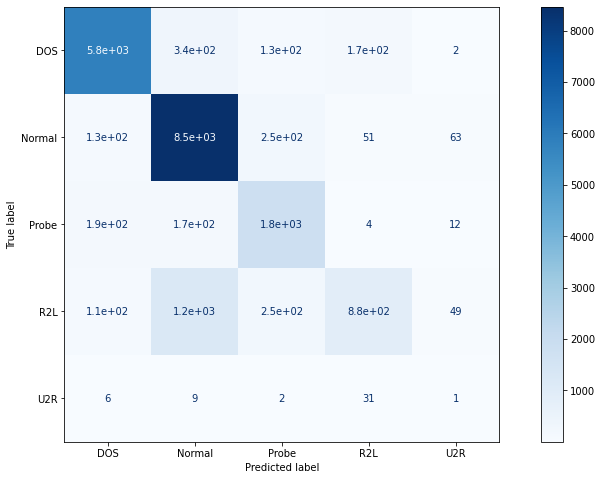

In [22]:
%matplotlib inline
model1=LogisticRegression( class_weight='balanced', penalty='l2',solver='newton-cg',C=100,random_state=0,max_iter=1200000)
model1.fit(X_train_otlr, y_oltr)
y_pred_1 = model1.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_1)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_1)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_1)

print("\n")
print('-------------------------')
print('| Logistic Regression |')
print('-------------------------')
print("Accuracy  after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_1,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_1)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
pd.crosstab(y_test_oltr, y_pred_1, rownames=['Actual attacks'], colnames=['Predicted attacks'])
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model1, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()


**Random Forest**



-------------------------
| Random Forest |
-------------------------
Accuracy of Random Forest after removing outliers: 75.17091053205192 

F1 score 0.7517091053205192


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         DOS       0.95      0.81      0.87      6477
      Normal       0.66      0.97      0.79      8960
       Probe       0.83      0.53      0.64      2171
         R2L       0.92      0.03      0.07      2529
         U2R       0.00      0.00      0.00        49

    accuracy                           0.75     20186
   macro avg       0.67      0.47      0.47     20186
weighted avg       0.80      0.75      0.71     20186

-------------------------
|Precision|
0.7517091053205192
-------------------------
|False positive rate|
-------------------------
[0.0188927  0.40138963 0.01326672 0.00045308 0.        ]
-------------------------


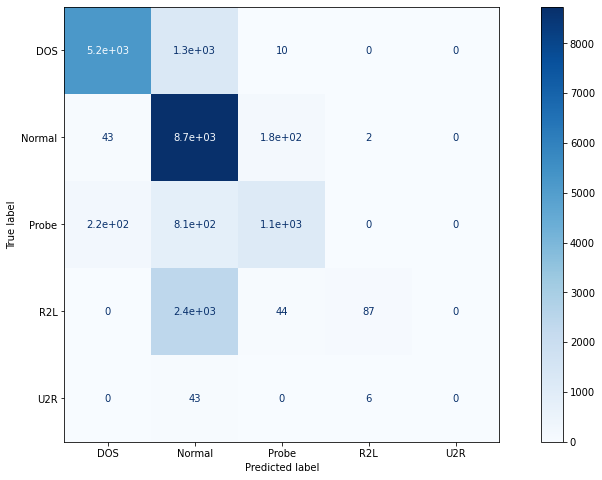

Predicted attacks,DOS,Normal,Probe,R2L
Actual attacks,,,,
DOS,5214,1253,10,0
Normal,43,8730,185,2
Probe,216,812,1143,0
R2L,0,2398,44,87
U2R,0,43,0,6


In [23]:
model2= RandomForestClassifier(criterion = "gini",class_weight='balanced',n_estimators=500, max_depth = 12,max_features = "log2", n_jobs = -1, random_state = 0)
model2.fit(X_train_otlr, y_oltr)
y_pred2 = model2.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred2)
lr_acc_score = accuracy_score(y_test_oltr, y_pred2)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred2)

print("\n")
print('-------------------------')
print('| Random Forest |')
print('-------------------------')
print("Accuracy of Random Forest after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred2,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred2)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')

fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model2, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks'])


**Decision Tree**



-------------------------
| Decision Tree |
-------------------------
Accuracy of Decision Tree after removing outliers: 78.22253046666006 

F1 score 0.7822253046666006


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         DOS       0.90      0.80      0.85      6477
      Normal       0.73      0.97      0.83      8960
       Probe       0.71      0.68      0.70      2171
         R2L       0.95      0.19      0.31      2529
         U2R       0.28      0.10      0.15        49

    accuracy                           0.78     20186
   macro avg       0.71      0.55      0.57     20186
weighted avg       0.81      0.78      0.76     20186

-------------------------
|Precision|
0.7822253046666006
-------------------------
|False positive rate|
-------------------------
[0.04289153 0.28309282 0.03275049 0.00152914 0.00064558]
-------------------------


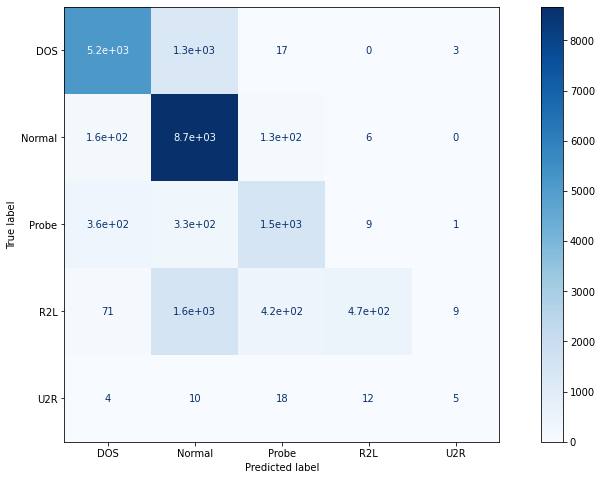

Predicted attacks,DOS,Normal,Probe,R2L,U2R
Actual attacks,,,,,
DOS,5172,1285,17,0,3
Normal,156,8668,130,6,0
Probe,357,333,1471,9,1
R2L,71,1550,425,474,9
U2R,4,10,18,12,5


In [28]:
model3= DecisionTreeClassifier(criterion = "gini",class_weight='balanced', max_depth = 10,  random_state = 0)
model3.fit(X_train_otlr, y_oltr)
y_pred_3 = model3.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_3)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_3)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_3)

print("\n")
print('-------------------------')
print('| Decision Tree |')
print('-------------------------')
print("Accuracy of Decision Tree after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_3,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_3)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')

fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model3, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred_3, rownames=['Actual attacks'], colnames=['Predicted attacks'])



**Linear Support Vector Machine**



-------------------------
| Support vector Machine |
-------------------------
Accuracy  on SVM after removing outliers: 82.75537501238482 

F1 score 0.8275537501238482


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         DOS       0.84      0.92      0.88      6477
      Normal       0.84      0.94      0.89      8960
       Probe       0.78      0.79      0.79      2171
         R2L       0.67      0.26      0.38      2529
         U2R       0.08      0.02      0.03        49

    accuracy                           0.83     20186
   macro avg       0.64      0.59      0.59     20186
weighted avg       0.81      0.83      0.81     20186

-------------------------
|Precision|
0.8275537501238482
-------------------------
|False positive rate|
-------------------------
[0.08016631 0.13931944 0.02697752 0.01817976 0.00054626]
-------------------------


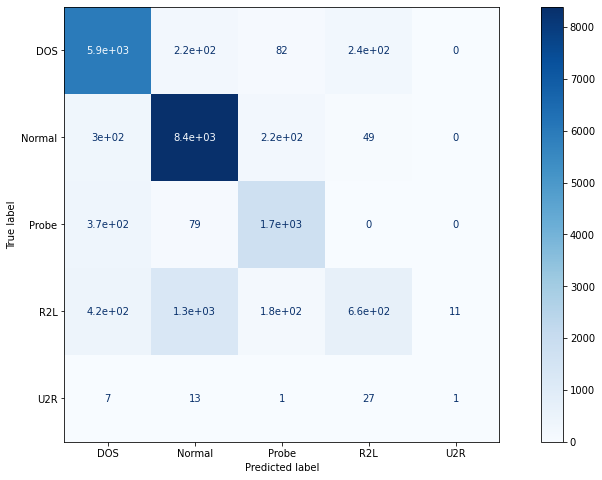

Predicted attacks,DOS,Normal,Probe,R2L,U2R
Actual attacks,,,,,
DOS,5934,216,82,245,0
Normal,303,8386,222,49,0
Probe,372,79,1720,0,0
R2L,417,1256,181,664,11
U2R,7,13,1,27,1


In [29]:
model4= svm.SVC(C = 10, gamma = 'scale', kernel = "linear",class_weight='balanced',probability=True)
model4.fit(X_train_otlr, y_oltr)
y_pred_4 = model4.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_4)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_4)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_4)

print("\n")
print('-------------------------')
print('| Support vector Machine |')
print('-------------------------')
print("Accuracy  on SVM after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_4,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_4)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')

fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model4, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred_4, rownames=['Actual attacks'], colnames=['Predicted attacks'])

**Catboost Classifier**

0:	learn: 1.5713897	total: 308ms	remaining: 30.5s
1:	learn: 1.5351635	total: 563ms	remaining: 27.6s
2:	learn: 1.5006966	total: 811ms	remaining: 26.2s
3:	learn: 1.4675041	total: 1.06s	remaining: 25.5s
4:	learn: 1.4357606	total: 1.31s	remaining: 24.9s
5:	learn: 1.4052781	total: 1.57s	remaining: 24.6s
6:	learn: 1.3759872	total: 1.82s	remaining: 24.2s
7:	learn: 1.3476902	total: 2.08s	remaining: 23.9s
8:	learn: 1.3206037	total: 2.33s	remaining: 23.5s
9:	learn: 1.2945526	total: 2.58s	remaining: 23.2s
10:	learn: 1.2692321	total: 2.82s	remaining: 22.8s
11:	learn: 1.2447362	total: 3.07s	remaining: 22.5s
12:	learn: 1.2215265	total: 3.32s	remaining: 22.2s
13:	learn: 1.1990284	total: 3.58s	remaining: 22s
14:	learn: 1.1770986	total: 3.82s	remaining: 21.7s
15:	learn: 1.1559050	total: 4.07s	remaining: 21.4s
16:	learn: 1.1353041	total: 4.33s	remaining: 21.1s
17:	learn: 1.1154680	total: 4.58s	remaining: 20.9s
18:	learn: 1.0961039	total: 4.83s	remaining: 20.6s
19:	learn: 1.0773432	total: 5.08s	remaining

<IPython.core.display.Javascript object>

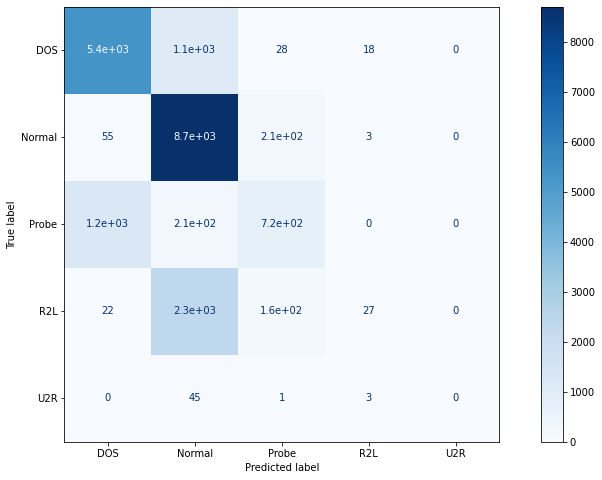

In [36]:
model5= CatBoostClassifier(iterations=100,learning_rate=0.01,depth=8)
model5.fit(X_train_otlr, y_oltr)
y_pred_5 = model5.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_5)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_5)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_5)

print("\n")
print('-------------------------')
print('| CatBoost Classifier |')
print('-------------------------')
print("Accuracy of Catboost Classifier after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_5,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_5)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model5, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()


**K Nearest Neighbour**



-------------------------
| KNN |
-------------------------
Accuracy of knn after removing outliers: 79.31239472902011 

F1 score 0.7931239472902011


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         DOS       0.96      0.84      0.89      6477
      Normal       0.73      0.97      0.83      8960
       Probe       0.73      0.73      0.73      2171
         R2L       0.76      0.11      0.20      2529
         U2R       0.00      0.00      0.00        49

    accuracy                           0.79     20186
   macro avg       0.64      0.53      0.53     20186
weighted avg       0.80      0.79      0.76     20186

-------------------------
|Precision|
0.7931239472902011
-------------------------
|False positive rate|
-------------------------
[0.01633963 0.29217887 0.03213988 0.00526703 0.        ]
-------------------------


<IPython.core.display.Javascript object>

Predicted attacks,DOS,Normal,Probe,R2L
Actual attacks,,,,
DOS,5414,1000,36,27
Normal,34,8719,206,1
Probe,190,356,1588,37
R2L,0,1907,333,289
U2R,0,17,4,28


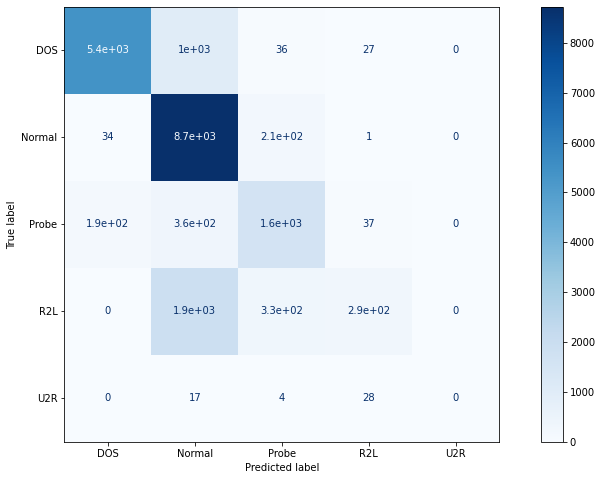

In [38]:
model6= KNeighborsClassifier(n_neighbors = 13,metric='manhattan',weights='distance')
model6.fit(X_train_otlr, y_oltr)
y_pred_6 = model6.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_6)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_6)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_6)

print("\n")
print('-------------------------')
print('| KNN |')
print('-------------------------')
print("Accuracy of knn after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_6,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_6)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model6, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
#pd.crosstab(y_test_oltr, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
pd.crosstab(y_test_oltr, y_pred_6, rownames=['Actual attacks'], colnames=['Predicted attacks'])

**XGBoost Classifier**



-------------------------
| XGB Classifier |
-------------------------
Accuracy of XGB Classifier after removing outliers: 74.7349648271079 

F1 score 0.747349648271079


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         DOS       0.94      0.80      0.87      6477
      Normal       0.65      0.97      0.78      8960
       Probe       0.86      0.55      0.67      2171
         R2L       0.00      0.00      0.00      2529
         U2R       0.00      0.00      0.00        49

    accuracy                           0.75     20186
   macro avg       0.49      0.46      0.46     20186
weighted avg       0.69      0.75      0.70     20186

-------------------------
|Precision|
0.747349648271079
-------------------------
|False positive rate|
-------------------------
[0.02202932 0.40994121 0.01087982 0.         0.        ]
-------------------------


<IPython.core.display.Javascript object>

Predicted attacks,DOS,Normal,Probe
Actual attacks,,,
DOS,5172,1300,5
Normal,45,8728,187
Probe,251,734,1186
R2L,6,2519,4
U2R,0,49,0


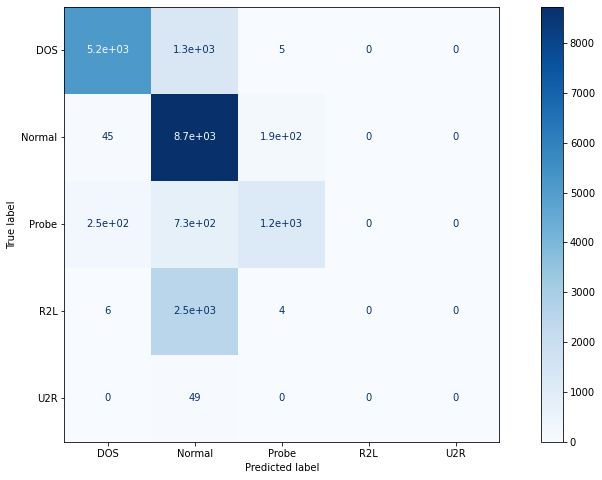

In [40]:
model7= XGBClassifier(learning_rate=0.01, n_estimators=50, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
model7.fit(X_train_otlr, y_oltr)
y_pred_7 = model7.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_7)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_7)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_7)

print("\n")
print('-------------------------')
print('| XGB Classifier |')
print('-------------------------')
print("Accuracy of XGB Classifier after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_7,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_7)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model7, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()

pd.crosstab(y_test_oltr, y_pred_7, rownames=['Actual attacks'], colnames=['Predicted attacks'])

**MLP Classifier**



-------------------------
| MLP Classifier |
-------------------------
Accuracy of MLP after removing outliers: 80.45675220449817 

F1 score 0.8045675220449816


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

         DOS       0.96      0.81      0.88      6477
      Normal       0.74      0.96      0.84      8960
       Probe       0.74      0.73      0.73      2171
         R2L       0.79      0.32      0.46      2529
         U2R       0.00      0.00      0.00        49

    accuracy                           0.80     20186
   macro avg       0.65      0.56      0.58     20186
weighted avg       0.82      0.80      0.79     20186

-------------------------
|Precision|
0.8045675220449817
-------------------------
|False positive rate|
-------------------------
[0.01553724 0.26447533 0.03036359 0.01223311 0.        ]
-------------------------


<IPython.core.display.Javascript object>

Predicted attacks,DOS,Normal,Probe,R2L
Actual attacks,,,,
DOS,5246,1023,63,145
Normal,30,8598,324,8
Probe,167,391,1579,34
R2L,14,1540,157,818
U2R,2,15,3,29


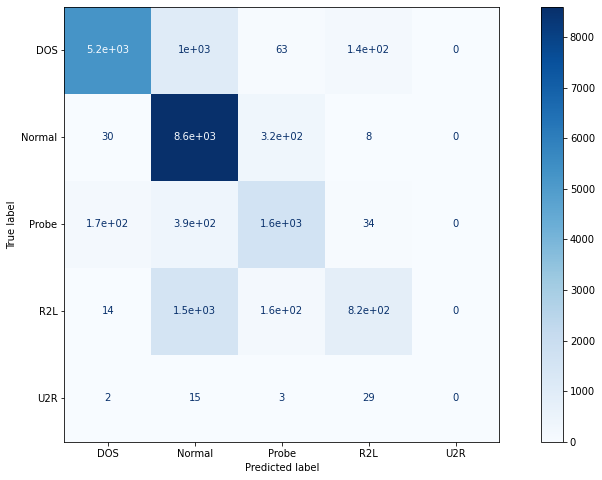

In [41]:
model8= MLPClassifier(activation = "relu", alpha = 0.01, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

model8.fit(X_train_otlr, y_oltr)
y_pred_8 = model8.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred_8)
lr_acc_score = accuracy_score(y_test_oltr, y_pred_8)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred_8)

print("\n")
print('-------------------------')
print('| MLP Classifier |')
print('-------------------------')
print("Accuracy of MLP after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred_8,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred_8)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
fig, ax = plt.subplots(figsize=(15, 8))
disp = plot_confusion_matrix(model8, X_test_otlr, y_test_oltr,ax=ax,cmap=plt.cm.Blues)
plt.show()
pd.crosstab(y_test_oltr, y_pred_8, rownames=['Actual attacks'], colnames=['Predicted attacks'])

In [42]:
from mlxtend.classifier import StackingCVClassifier
from mlxtend.classifier import StackingClassifier

In [43]:
encoder=LabelEncoder()
y_oltr=encoder.fit_transform(y_oltr)
y_test_oltr=encoder.transform(y_test_oltr)

In [ ]:
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}

**Stacking classifier**

In [ ]:
sclf = StackingCVClassifier(classifiers=[model1, model2,model3,model4,model6,model8], cv=5,
                            meta_classifier = svm.SVC(probability = True))

grid = GridSearchCV(estimator = sclf, 
                        param_grid = params, 
                        cv = 5,
                        verbose = 0,
                        n_jobs = -1)
sclf.fit(X_train_otlr, y_oltr)
y_pred = sclf.predict(X_test_otlr)
cm = confusion_matrix(y_test_oltr, y_pred)
lr_acc_score = accuracy_score(y_test_oltr, y_pred)
FPR,prec,rec= falseposrate(cm,y_test_oltr,y_pred)

print("\n")
print("Accuracy of StackingCVClassifier after removing outliers:",lr_acc_score*100,'\n')
print("="*50)
print("F1 score", f1_score(y_test_oltr,y_pred,average='micro'))
print("\n")
print('-------------------------')
print('| Classifiction Report |')
print('-------------------------')
classification_report = metrics.classification_report(y_test_oltr, y_pred)
print(classification_report)
print('-------------------------')
print("|Precision|")
print(prec)
print('-------------------------')


print("|False positive rate|")
print('-------------------------')
print(FPR)
print('-------------------------')
pd.crosstab(y_test_oltr, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])



Accuracy of StackingCVClassifier after removing outliers: 75.43842266917665 

F1 score 0.7543842266917665


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      6477
           1       0.66      0.98      0.79      8960
           2       0.85      0.55      0.67      2171
           3       0.95      0.04      0.08      2529
           4       0.00      0.00      0.00        49

    accuracy                           0.75     20186
   macro avg       0.69      0.47      0.48     20186
weighted avg       0.81      0.75      0.71     20186

-------------------------
|Precision|
0.7543842266917665
-------------------------
|False positive rate|
-------------------------
[1.33488949e-02 4.06556209e-01 1.14349153e-02 2.83173812e-04
 0.00000000e+00]
-------------------------


Predicted attacks,0,1,2,3
Actual attacks,,,,
0,5176,1298,3,0
1,19,8760,181,0
2,164,818,1189,0
3,0,2405,21,103
4,0,43,1,5


# From all the above models we can conclude that Logistic Regression Model is working best on this data and giving us best accuracy. Hence we will save our model1(Logistic Regression model) and use it for prediction.

In [47]:
with open('finalized_model.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [48]:
with open('finalized_model.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

In [49]:

clf_loaded

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1200000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)